# EDA and Pre processing

In [1]:
#import essential libraries 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH="train.csv"
df= pd.read_csv(DATA_PATH)

#overview of dataset 
df.shape

(5000, 20)

In [3]:
#display first few rows
df.head()

,Hospital_Id,Supplier_Name,Supplier_Reliability,Equipment_Height,Equipment_Width,Equipment_Weight,Equipment_Type,Equipment_Value,Base_Transport_Fee,CrossBorder_Shipping,Urgent_Shipping,Installation_Service,Transport_Method,Fragile_Equipment,Hospital_Info,Rural_Hospital,Order_Placed_Date,Delivery_Date,Hospital_Location,Transport_Cost
0,fffe3200360030003700,Jo Valencia,0.44,21.0,6.0,NaN,NaN,3.62,17.13,No,No,No,Roadways,No,Working Class,No,10/20/17,10/20/17,APO AA 33776,179.50
1,fffe3400380037003400,Wanda Warren,0.58,29.0,20.0,1210684.0,Marble,9703.37,35.42,No,Yes,Yes,Roadways,No,Working Class,No,02/22/16,02/24/16,"South Kevin, VT 84493",627732.45
2,fffe3200350036003700,Robert Ackies,0.97,39.0,15.0,3305.0,Aluminium,40.21,18.54,No,No,No,Roadways,No,Working Class,No,01/11/18,01/10/18,"Kevinshire, NE 31279",1565.92
3,fffe3800320034003400,Charlotte Membreno,0.70,8.0,5.0,606.0,Brass,4.55,17.48,No,No,No,Roadways,No,Working Class,No,08/06/16,08/06/16,DPO AP 61572,257.71
4,fffe3600340033003000,Nena Silva,0.66,27.0,13.0,NaN,Marble,2726.80,30.23,Yes,No,No,Roadways,No,Working Class,NaN,12/15/16,12/17/16,"Joshuamouth, AK 01550",8553.52


In [4]:
#check data types
df.dtypes

Hospital_Id              object
Supplier_Name            object
Supplier_Reliability    float64
Equipment_Height        float64
Equipment_Width         float64
Equipment_Weight        float64
Equipment_Type           object
Equipment_Value         float64
Base_Transport_Fee      float64
CrossBorder_Shipping     object
Urgent_Shipping          object
Installation_Service     object
Transport_Method         object
Fragile_Equipment        object
Hospital_Info            object
Rural_Hospital           object
Order_Placed_Date        object
Delivery_Date            object
Hospital_Location        object
Transport_Cost          float64
dtype: object

In [5]:
#quick summary of DataFrame
#df.info

In [6]:
#statistics of the data 
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Hospital_Id,5000,5000,fffe3100300038003300,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Supplier_Name,5000,4966,James Moore,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Supplier_Reliability,4413.0,NaN,NaN,NaN,0.460925,0.265964,0.0,0.23,0.45,0.67,1.0
Equipment_Height,4717.0,NaN,NaN,NaN,21.759593,11.944434,3.0,12.0,20.0,30.0,73.0
Equipment_Width,4557.0,NaN,NaN,NaN,9.585034,5.407542,2.0,6.0,8.0,12.0,50.0
Equipment_Weight,4540.0,NaN,NaN,NaN,409758.435022,2808639.916146,3.0,507.0,3137.5,36941.5,117927869.0
Equipment_Type,4401,7,Aluminium,655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Equipment_Value,5000.0,NaN,NaN,NaN,1190.293363,8724.804213,3.0,5.26,7.935,87.0475,382385.67
Base_Transport_Fee,5000.0,NaN,NaN,NaN,37.374362,26.907914,10.0,16.63,23.41,57.805,99.98
CrossBorder_Shipping,5000,2,No,3333,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#check for duplicates 
if 'Hospital_Id' in df.columns:
    print("Duplicate Hospital_IDs:",df['Hospital_Id'].duplicated().sum())

# so no two rows are the same 

Duplicate Hospital_IDs: 0


In [8]:
#lear about the target 
target='Transport_Cost'
df[target].describe()


# standard deviation is a lot so skewed 

count    5.000000e+03
mean     1.789806e+04
std      2.554261e+05
min     -5.881832e+05
25%      1.884150e+02
50%      3.776050e+02
75%      1.182702e+03
max      1.114343e+07
Name: Transport_Cost, dtype: float64

In [9]:
#check for negatives 
numeric_cols=df.select_dtypes('number').columns.tolist()
print("any negative numeric values per column:")
display((df[numeric_cols]<0).any())

any negative numeric values per column:


Supplier_Reliability    False
Equipment_Height        False
Equipment_Width         False
Equipment_Weight        False
Equipment_Value         False
Base_Transport_Fee      False
Transport_Cost           True
dtype: bool

In [10]:
#check how many negatives are present 
num_negative_costs = df['Transport_Cost'] < 0
print(f"Number of Negative Transport Costs: {num_negative_costs.sum()}")

Number of Negative Transport Costs: 493


In [11]:
#options to deal with negative counts:

# 1. Set all negative Transport_Cost values to 0.0
#df.loc[df['Transport_Cost'] < 0, 'Transport_Cost'] = 0.0


# 2. drop the negative rows 
num_rows_before = len(df)
df = df[df['Transport_Cost'] >= 0]
num_rows_after = len(df)
print(f"Dropped {num_rows_before - num_rows_after} rows with negative costs.")

''''
# 3. take absolute value 
df['Transport_Cost'] = df['Transport_Cost'].abs()

# 4. set to NaN
df.loc[df['Transport_Cost'] < 0, 'Transport_Cost'] = np.nan

# 5. leave as negative 
'''

# Re-verify the count (should be 0)
num_negative_costs_after = df['Transport_Cost'] < 0
print(f"Negative Transport Costs after cleaning: {num_negative_costs_after.sum()}")

Dropped 493 rows with negative costs.
Negative Transport Costs after cleaning: 0


In [12]:
#final any null values in the target 
df.shape
print("Missing in target:",df[target].isnull().sum())

Missing in target: 0


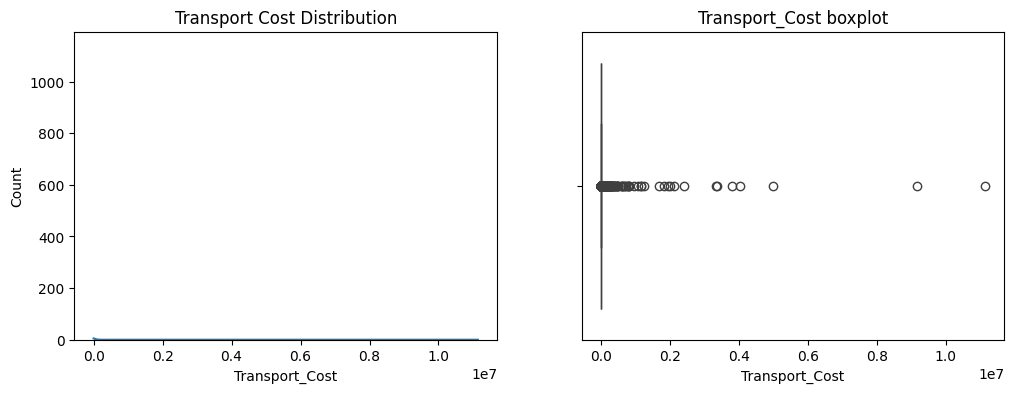

In [13]:
#plot the target variable 
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df[target].dropna(),kde=True)
plt.title('Transport Cost Distribution')

plt.subplot(1,2,2)
sns.boxplot(x=df[target])
plt.title('Transport_Cost boxplot')
plt.show()


# The data has a few massive outlier costs that are squashing the entire plot to the left. 
# You can't see the main distribution (where 99% of data lives) because the x-axis is forced to be 10 million units long.

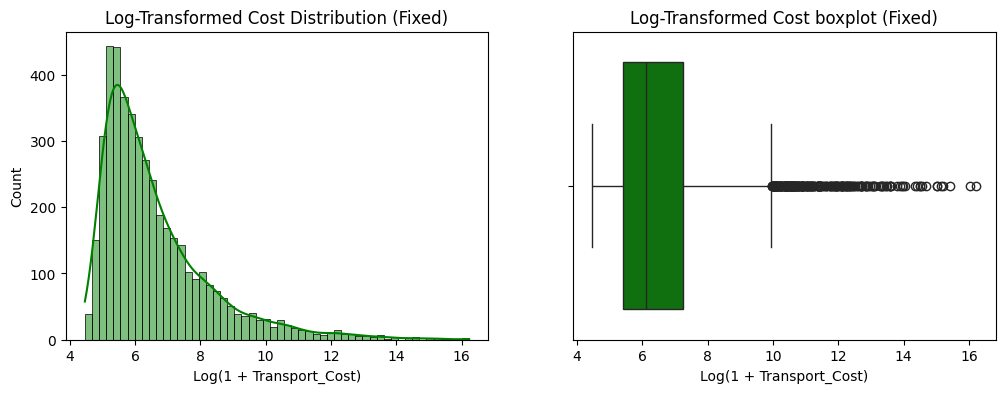

In [14]:
# --- Create the Log-Transformed Column ---
# We use np.log1p() which calculates log(1 + x)
# This safely handles any costs that are 0
target = 'Transport_Cost'
log_target = 'Log_Transport_Cost'
df[log_target] = np.log1p(df[target].dropna())

# --- Plot the new Log-Transformed Target ---
plt.figure(figsize=(12, 4))

# 1. Histogram (now on the log-transformed data)
plt.subplot(1, 2, 1)
sns.histplot(df[log_target], kde=True, color='green')
plt.title('Log-Transformed Cost Distribution (Fixed)')
plt.xlabel('Log(1 + Transport_Cost)')

# 2. Boxplot (now on the log-transformed data)
plt.subplot(1, 2, 2)
sns.boxplot(x=df[log_target], color='green')
plt.title('Log-Transformed Cost boxplot (Fixed)')
plt.xlabel('Log(1 + Transport_Cost)')

plt.show()

In [15]:
# Skewness & kurtosis of log 
print("Skewness: %.3f  Kurtosis: %.3f" % (df['Log_Transport_Cost'].skew(), df['Log_Transport_Cost'].kurt()))

Skewness: 1.767  Kurtosis: 3.874


,missing_pct
Transport_Method,0.207011
Equipment_Type,0.117595
Supplier_Reliability,0.117595
Rural_Hospital,0.117373
Equipment_Weight,0.089860
Equipment_Width,0.089195
Equipment_Height,0.056135
Supplier_Name,0.000000
Hospital_Id,0.000000
Base_Transport_Fee,0.000000


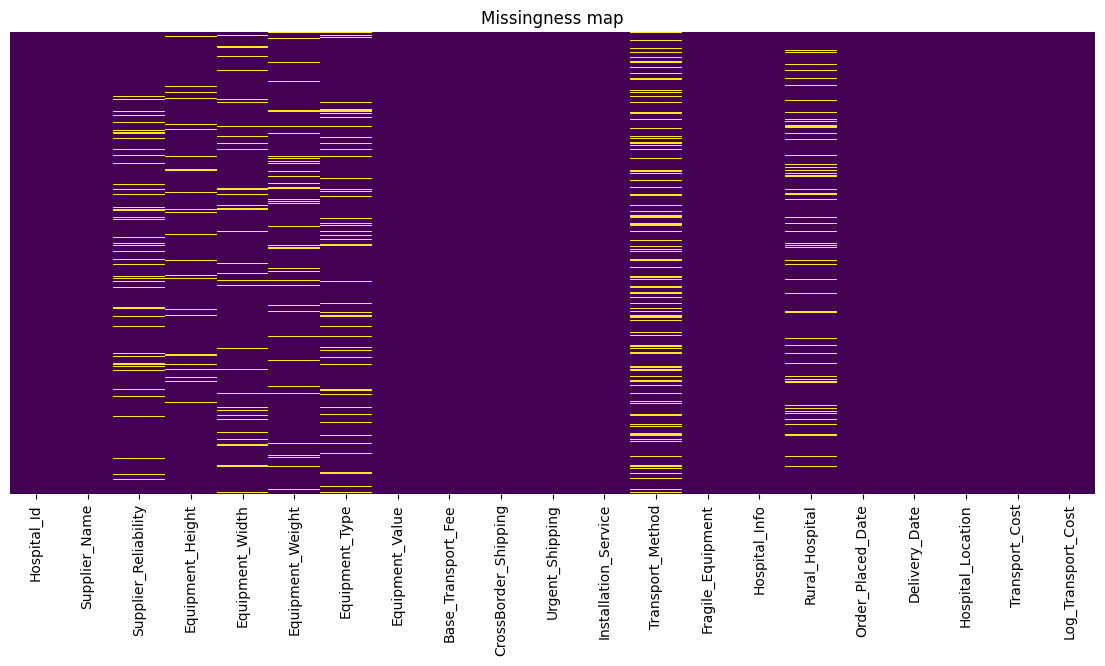

Supplier_Reliability                           mean  count
Supplier_Reliability                 
False                 6.606179   3977
True                  6.539055    530
Equipment_Height                       mean  count
Equipment_Height                 
False             6.595384   4254
True              6.647076    253
Equipment_Width                     mean  count
Equipment_Width                
False            6.59216   4105
True             6.66084    402
Equipment_Weight                       mean  count
Equipment_Weight                 
False             6.608083   4102
True              6.499060    405
Equipment_Type                     mean  count
Equipment_Type                 
False           6.603882   3977
True            6.556289    530
Transport_Method                       mean  count
Transport_Method                 
False             6.586587   3574
True              6.643098    933
Rural_Hospital                     mean  count
Rural_Hospital                 
Fa

In [16]:
#missing values check
missing_pct=df.isnull().mean().sort_values(ascending=False)
display(pd.DataFrame({'missing_pct':missing_pct}))

#plot the missingness map 
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missingness map')
plt.show()

# Missingness vs. target (check if missing correlated with target)
missing_vs_target = {}
for col in df.columns:
    if df[col].isnull().any() and col != 'Log_Transport_Cost':
        missing_vs_target[col] = df.groupby(df[col].isnull())['Log_Transport_Cost'].agg(['mean','count']).to_dict()
# quick textual check:
for col in missing_vs_target:
    print(col, df.groupby(df[col].isnull())['Log_Transport_Cost'].agg(['mean','count']))


In [17]:
#make binary features 
missing_cols = [
    'Supplier_Reliability',
    'Equipment_Height',
    'Equipment_Width',
    'Equipment_Weight',
    'Equipment_Type',
    'Transport_Method',
    'Rural_Hospital'
]

# Create binary indicators (1 = missing, 0 = not missing)
for col in missing_cols:
    df[col + '_Is_Missing'] = df[col].isnull().astype(int)

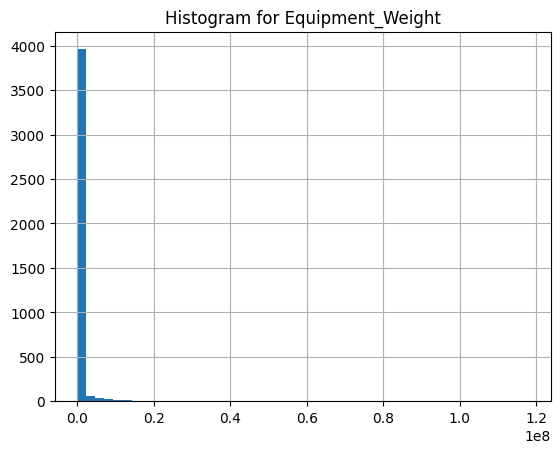

count    4.102000e+03
mean     4.177976e+05
std      2.908731e+06
min      3.000000e+00
25%      5.072500e+02
50%      3.162000e+03
75%      3.686725e+04
max      1.179279e+08
Name: Equipment_Weight, dtype: float64


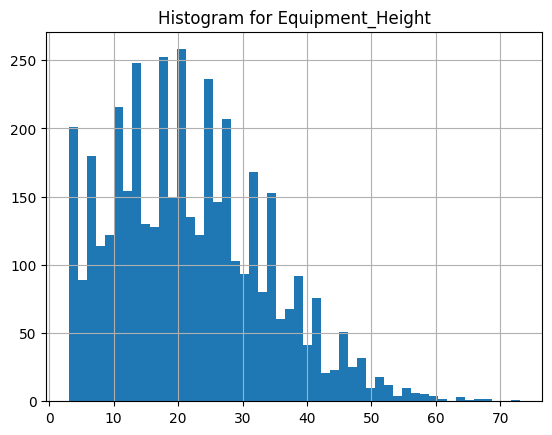

count    4254.000000
mean       21.798072
std        11.893104
min         3.000000
25%        12.000000
50%        21.000000
75%        29.000000
max        73.000000
Name: Equipment_Height, dtype: float64


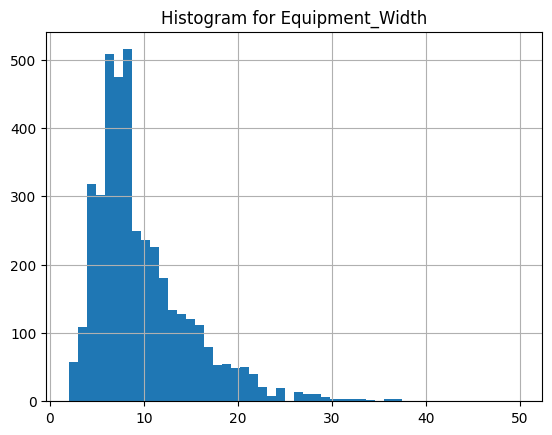

count    4105.000000
mean        9.616809
std         5.417426
min         2.000000
25%         6.000000
50%         8.000000
75%        12.000000
max        50.000000
Name: Equipment_Width, dtype: float64


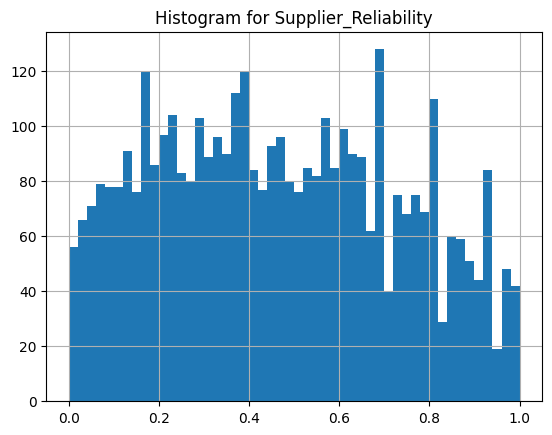

count    3977.000000
mean        0.460847
std         0.266524
min         0.000000
25%         0.230000
50%         0.450000
75%         0.680000
max         1.000000
Name: Supplier_Reliability, dtype: float64


In [18]:
#check for skewness in numerical features with missing values 

#--1 
# 1. Visual Check
col_to_check = 'Equipment_Weight'
df[col_to_check].hist(bins=50)
plt.title(f'Histogram for {col_to_check}')
plt.show()
# 2. Statistical Check: Compare mean and median
print(df[col_to_check].describe())


#--2
# 1. Visual Check: Look at the histogram
col_to_check = 'Equipment_Height'
df[col_to_check].hist(bins=50)
plt.title(f'Histogram for {col_to_check}')
plt.show()
# 2. Statistical Check: Compare mean and median
print(df[col_to_check].describe())

#--3
# 1. Visual Check: Look at the histogram
col_to_check = 'Equipment_Width'
df[col_to_check].hist(bins=50)
plt.title(f'Histogram for {col_to_check}')
plt.show()
# 2. Statistical Check: Compare mean and median
print(df[col_to_check].describe())

#--4
# 1. Visual Check: Look at the histogram
col_to_check = 'Supplier_Reliability'
df[col_to_check].hist(bins=50)
plt.title(f'Histogram for {col_to_check}')
plt.show()
# 2. Statistical Check: Compare mean and median
print(df[col_to_check].describe())

In [19]:
# if skewed then replace with median 

# 1. Log-transform first (this will keep NaNs as NaNs)
df['Equipment_Weight_Log'] = np.log1p(df['Equipment_Weight'])

# 2. Fill with the median *of the new log column*
log_median_val = df['Equipment_Weight_Log'].median()
median_val = df['Equipment_Weight'].median()
df['Equipment_Weight_Log'] = df['Equipment_Weight_Log'].fillna(log_median_val)
df['Equipment_Weight'] = df['Equipment_Weight'].fillna(median_val)

num_cols = ['Equipment_Height', 'Equipment_Width', 'Supplier_Reliability']

for col in num_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

--- Comparing Missing vs. Non-Missing Values ---


/tmp/ipykernel_1938/377492468.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Missing (False)', 'Is Missing (True)'])
/tmp/ipykernel_1938/377492468.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Missing (False)', 'Is Missing (True)'])
/tmp/ipykernel_1938/377492468.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Missing (False)', 'Is Missing (True)'])


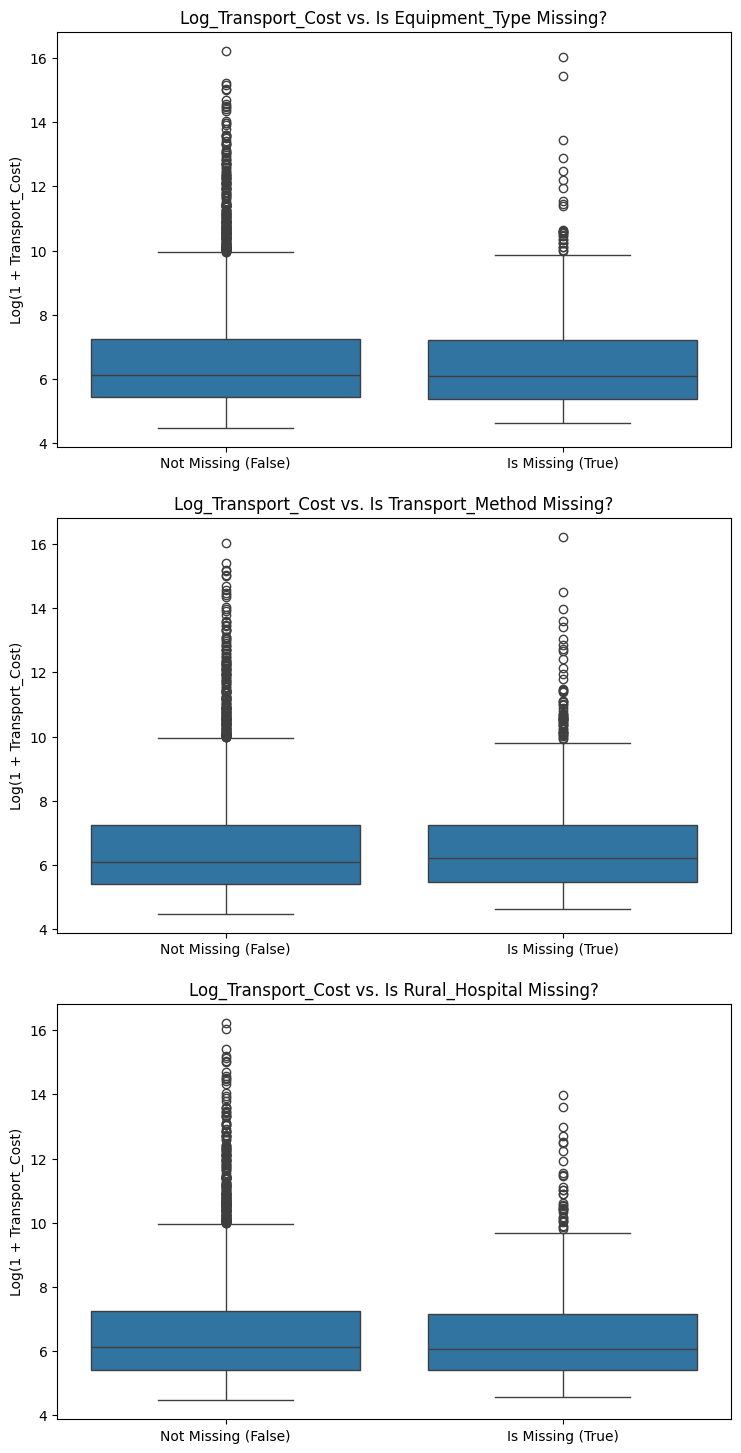

In [20]:
# now check for categorical features 
categorical_cols_with_missing = [
    'Equipment_Type',
    'Transport_Method',
    'Rural_Hospital'
]

print("--- Comparing Missing vs. Non-Missing Values ---")

# Create a figure to hold all the plots
num_cols = len(categorical_cols_with_missing)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, num_cols * 5))
fig.tight_layout(pad=3.0)

if num_cols == 1: # Handle case of just one plot
    axes = [axes]

for i, col in enumerate(categorical_cols_with_missing):
    # 1. Create the temporary '_Is_Missing' helper column
    helper_col = col + '_Is_Missing'
    df[helper_col] = df[col].isnull()

    # 2. Create the box plot
    ax = axes[i]
    sns.boxplot(x=df[helper_col], y=df['Log_Transport_Cost'], ax=ax)
    
    ax.set_title(f'Log_Transport_Cost vs. Is {col} Missing?')
    ax.set_xticklabels(['Not Missing (False)', 'Is Missing (True)'])
    ax.set_xlabel('')
    ax.set_ylabel('Log(1 + Transport_Cost)')
    
    # 3. Drop the helper column
    df = df.drop(columns=[helper_col])

plt.show()

In [21]:
#fill the missing values of categorical features with the mode 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

cat_cols = ['Equipment_Type', 'Transport_Method', 'Rural_Hospital']

for col in cat_cols:
    if col in df.columns:
        # 1. Find the most frequent value (the mode)
        mode_value = df[col].mode()[0] 
        # 2. Fill NaNs with that value
        df[col] = df[col].fillna(mode_value)  

In [22]:
# check if all missing values are gone 
df[missing_cols].isnull().sum()

Supplier_Reliability    0
Equipment_Height        0
Equipment_Width         0
Equipment_Weight        0
Equipment_Type          0
Transport_Method        0
Rural_Hospital          0
dtype: int64

Found 11 numeric features and 13 categorical features.
----------------------------------------
Plotting numeric features...


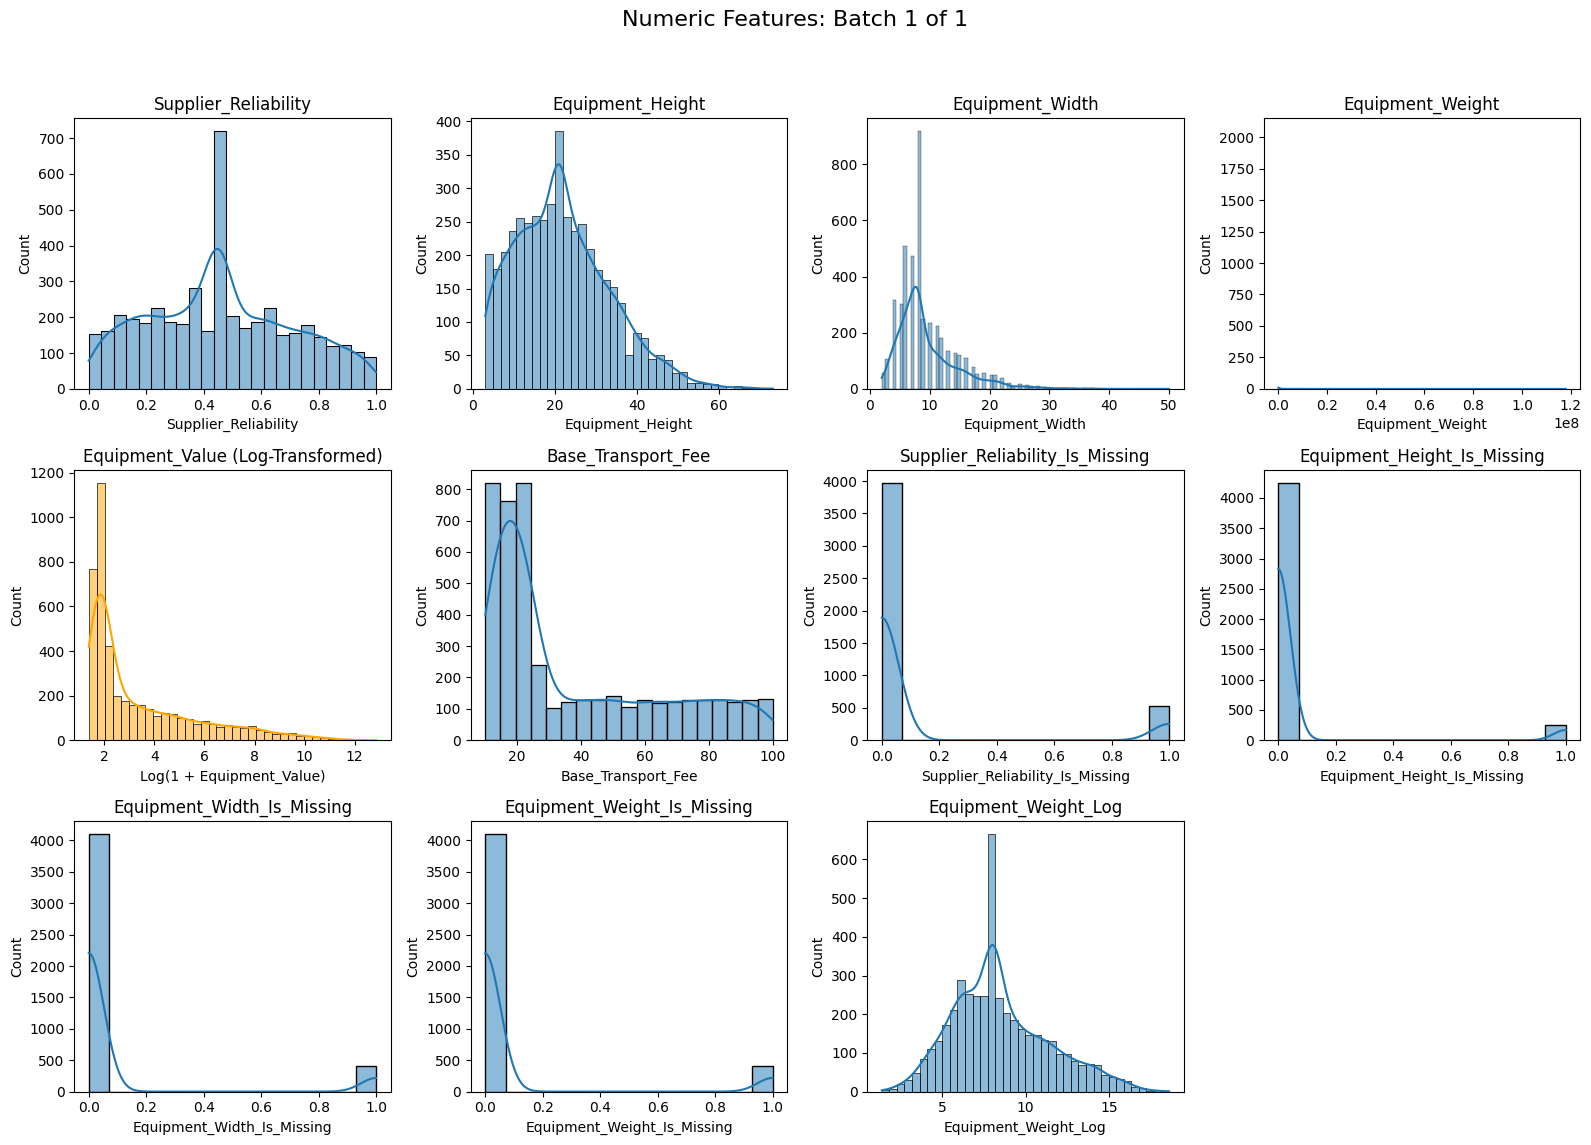

----------------------------------------
Plotting categorical features...


/tmp/ipykernel_1938/3113973874.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


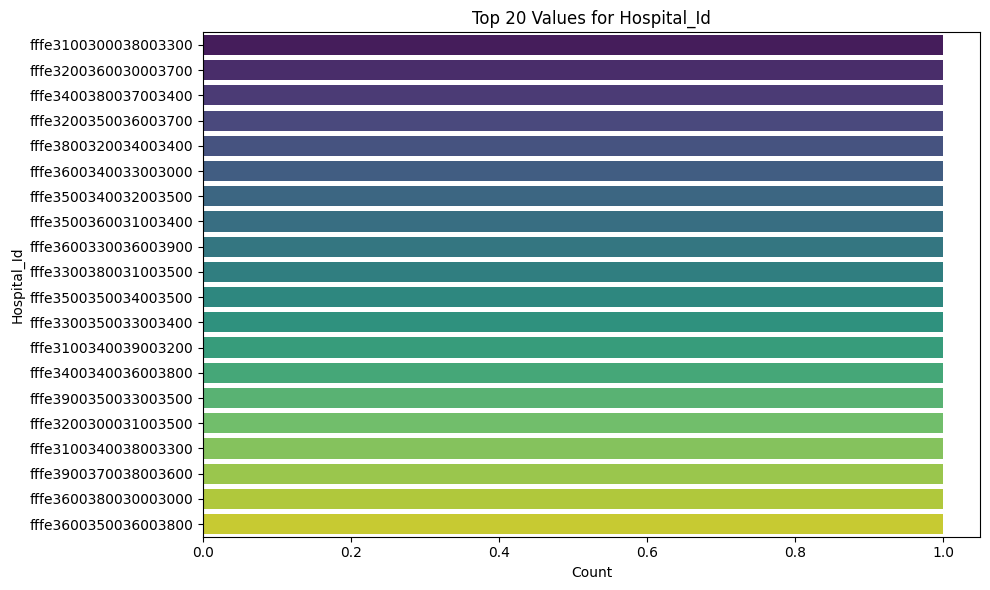

/tmp/ipykernel_1938/3113973874.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


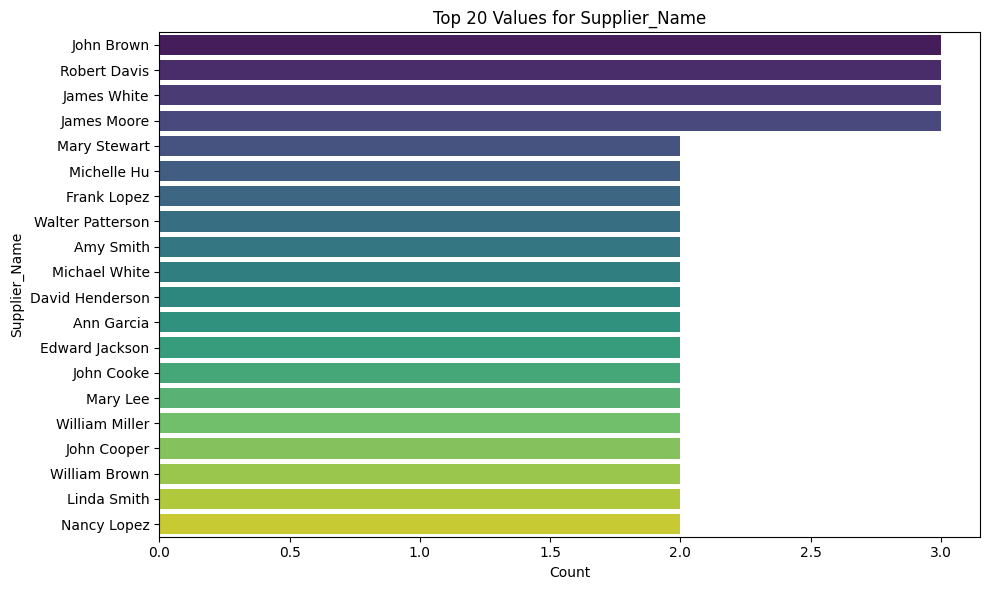

/tmp/ipykernel_1938/3113973874.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


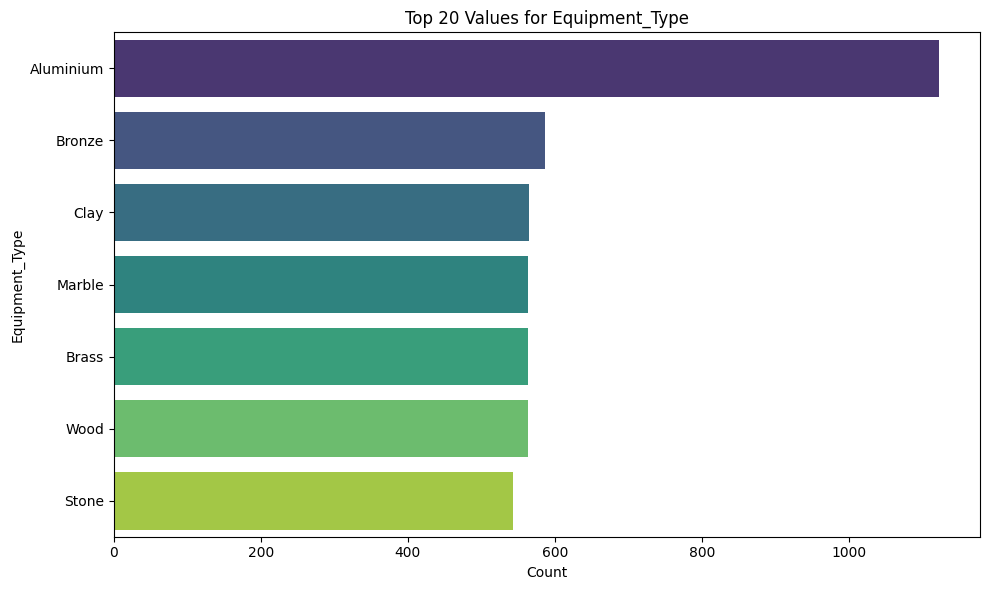

/tmp/ipykernel_1938/3113973874.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


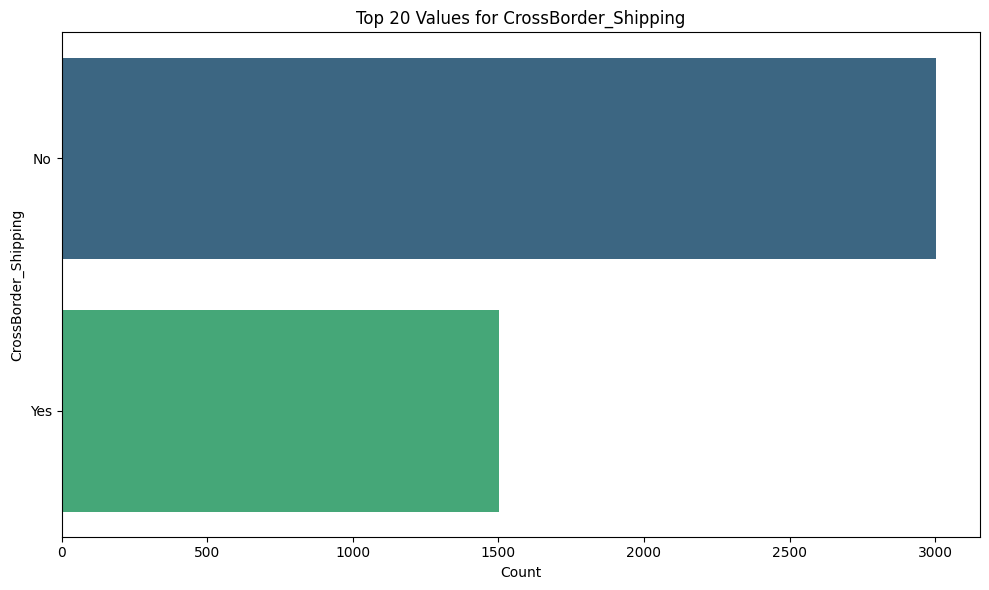

/tmp/ipykernel_1938/3113973874.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


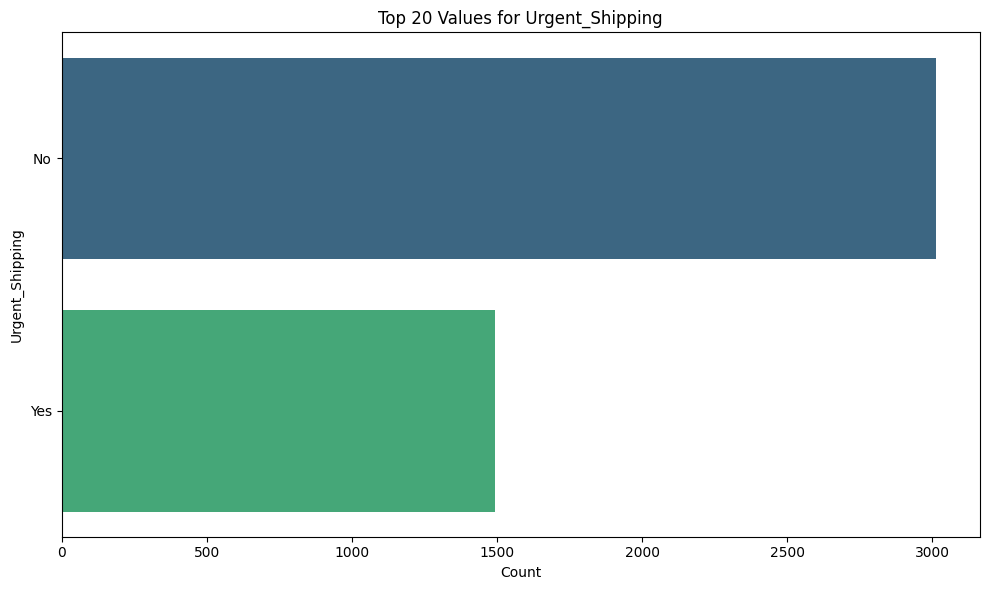

/tmp/ipykernel_1938/3113973874.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


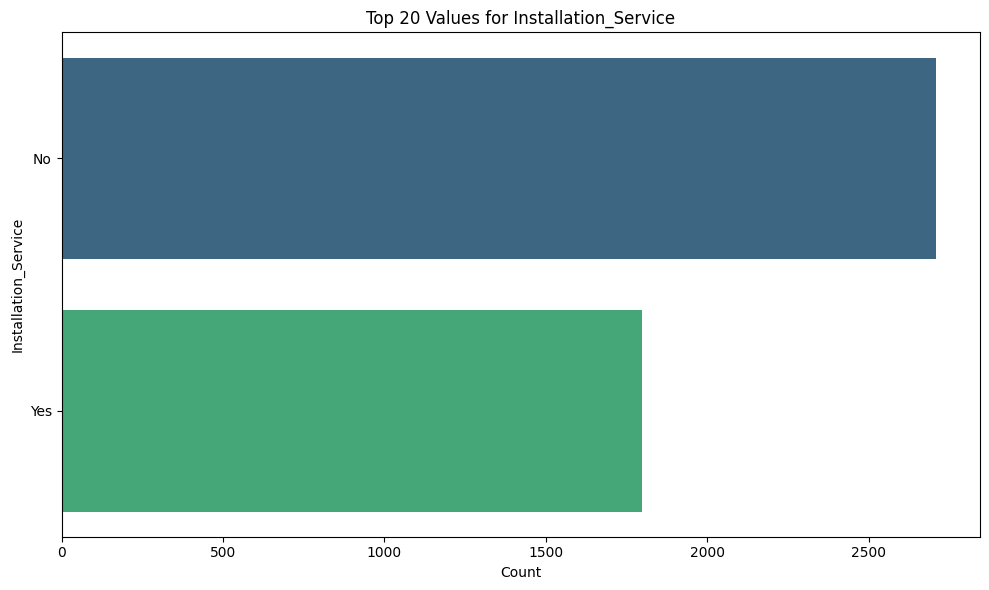

/tmp/ipykernel_1938/3113973874.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


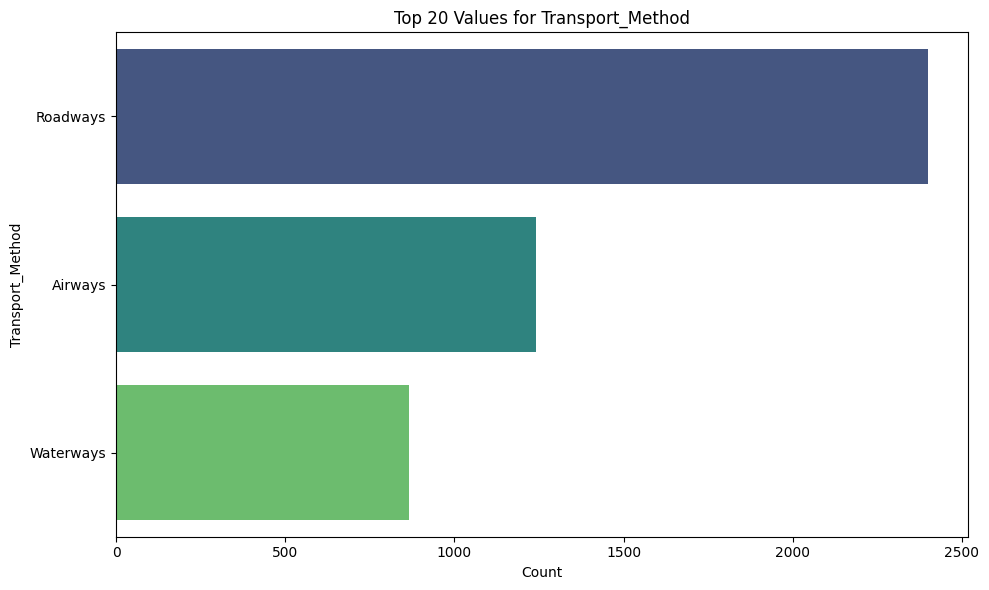

/tmp/ipykernel_1938/3113973874.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


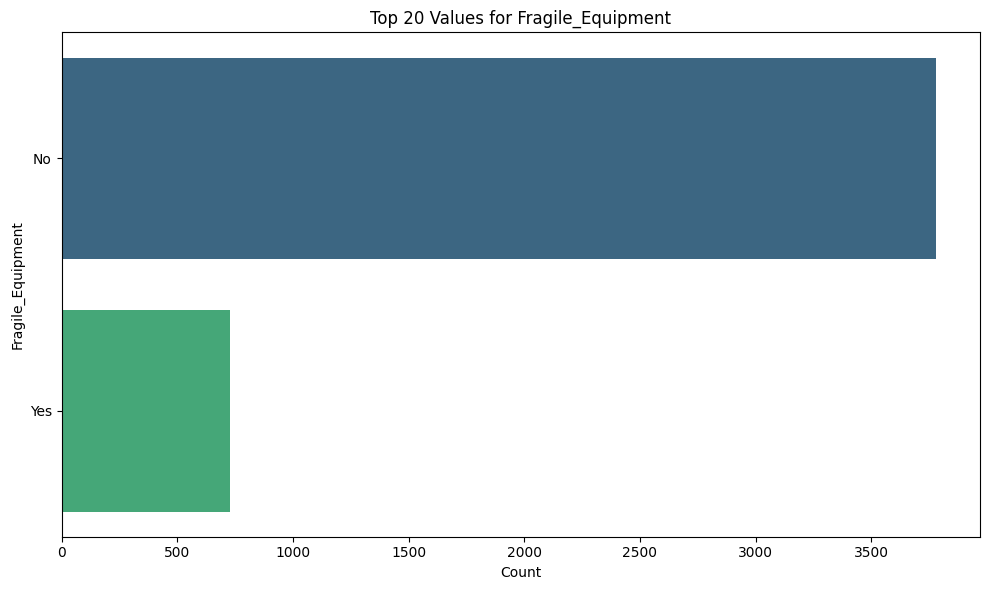

/tmp/ipykernel_1938/3113973874.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


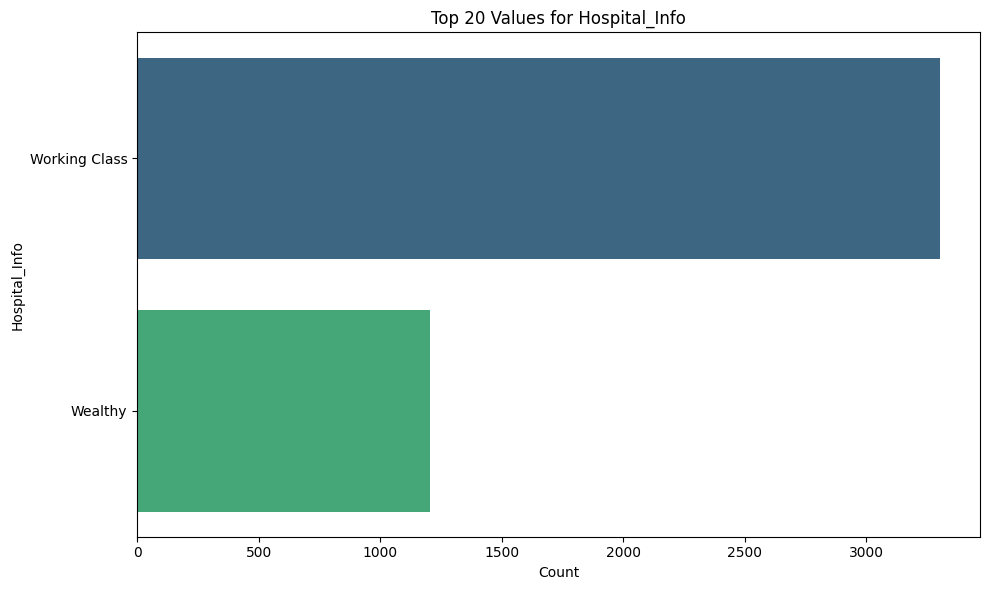

/tmp/ipykernel_1938/3113973874.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


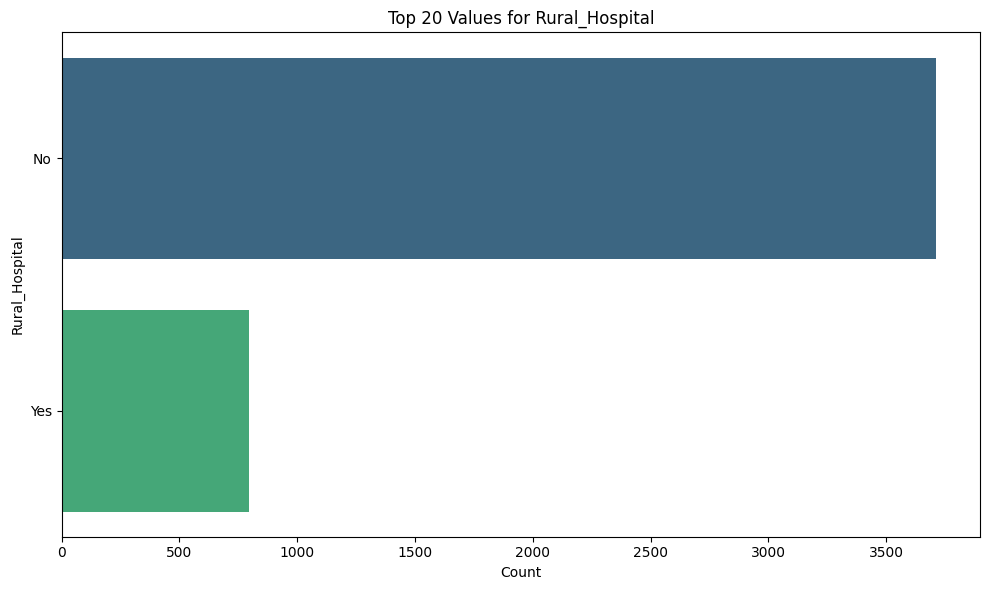

/tmp/ipykernel_1938/3113973874.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


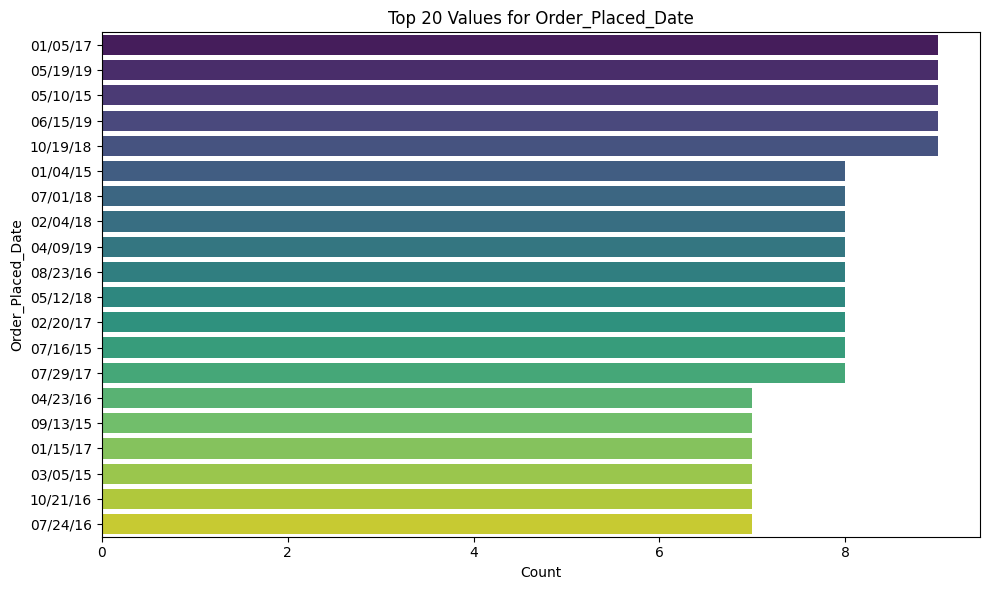

/tmp/ipykernel_1938/3113973874.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


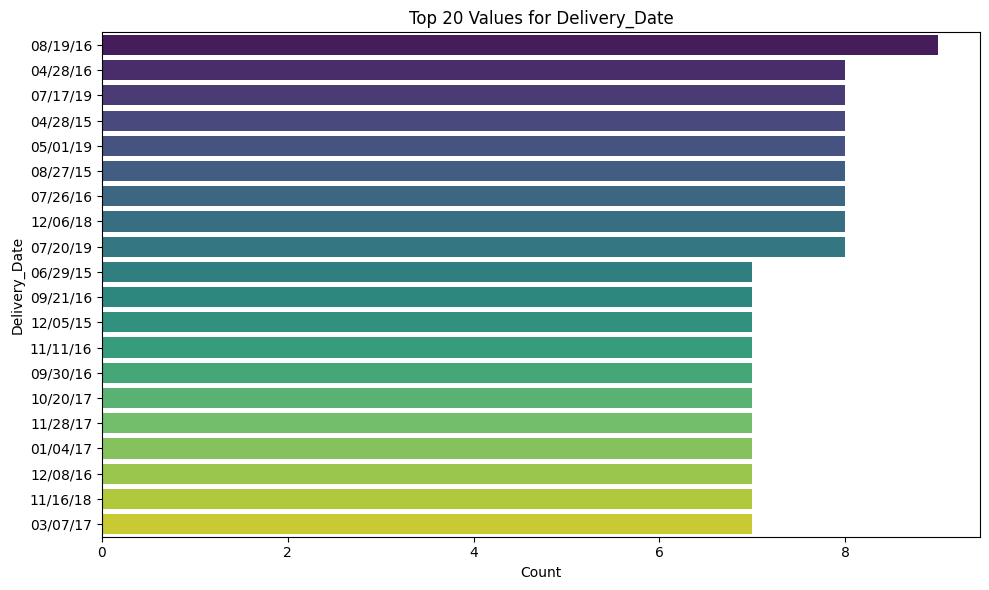

/tmp/ipykernel_1938/3113973874.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


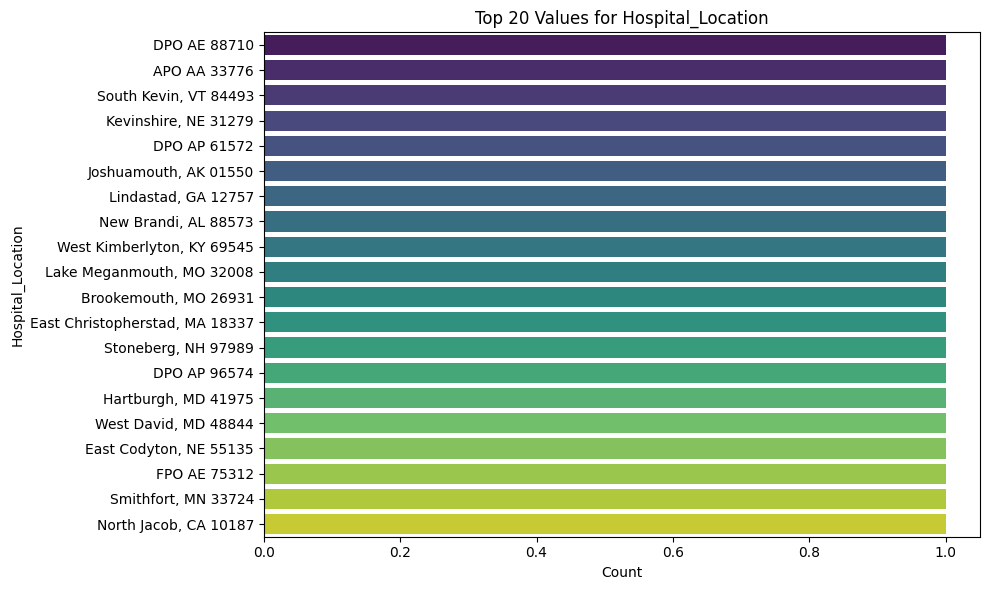

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Identify feature types
# Make sure to drop all target-related columns
target_cols = ['Transport_Cost', 'Log_Transport_Cost'] 
num_cols = df.select_dtypes(include=['number']).columns.drop(target_cols, errors='ignore').tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()

print(f"Found {len(num_cols)} numeric features and {len(cat_cols)} categorical features.")
print("-" * 40)

# -----------------------------------------------------------------
## --- 1. Plot Numeric Features (in Batches, with Log-Transform) ---
# -----------------------------------------------------------------
print("Plotting numeric features...")

# --- Settings ---
batch_size = 12       # How many plots per figure
cols_per_row = 4      # How many plots per row
# ---

num_batches = int(np.ceil(len(num_cols) / batch_size))

for i in range(num_batches):
    # Get the subset of columns for this batch
    start = i * batch_size
    end = min((i + 1) * batch_size, len(num_cols))
    subset = num_cols[start:end]
    
    num_rows = int(np.ceil(len(subset) / cols_per_row))
    
    plt.figure(figsize=(16, num_rows * 4))
    plt.suptitle(f'Numeric Features: Batch {i+1} of {num_batches}', fontsize=16)
    
    for j, col in enumerate(subset, 1):
        plt.subplot(num_rows, cols_per_row, j)
        
        # --- FIX: Check for skew and plot log-transform ---
        # If the max is 100x bigger than the 95th percentile, it's skewed
        data_to_plot = df[col].dropna()
        
        # Check if column is empty after dropping NaNs
        if data_to_plot.empty:
            plt.title(f"{col}\n(All NaN values)")
            continue

        p95 = data_to_plot.quantile(0.95)
        max_val = data_to_plot.max()
        
        # Check for skew (and avoid p95 being 0)
        if (p95 > 0 and max_val / p95 > 100) or (p95 == 0 and max_val > 0):
            # It's skewed! Plot log(1+x)
            sns.histplot(np.log1p(data_to_plot), kde=True, color='orange')
            plt.title(f"{col} (Log-Transformed)")
            plt.xlabel("Log(1 + " + col + ")")
        else:
            # Not skewed, plot normally
            sns.histplot(data_to_plot, kde=True)
            plt.title(col)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# -----------------------------------------------------------------
## --- 2. Plot Categorical Features (Top 20 Values) ---
# -----------------------------------------------------------------
print("-" * 40)
print("Plotting categorical features...")

for col in cat_cols:
    plt.figure(figsize=(10, 6))
    
    # Get the Top 20 most frequent values
    top_n_order = df[col].value_counts().head(20).index
    
    # Plot as a horizontal count plot (easier to read)
    sns.countplot(
        data=df, 
        y=col, # Use y-axis for the category
        order=top_n_order,
        palette='viridis'
    )
    
    plt.title(f'Top 20 Values for {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [24]:
'''
---Keep as it is:
cross border
urgent shipping
installation serice
fragile equipment 
hospital info 

---has missing, but is fixed with mode:
transport method
rural hospital 
equipment type 

-- num missing fixed:
supplier 
equ hei
equ wid

-- to drop:
hospital id
supplier name 
hospital loca

-- can add feature for linear:
base transport fee : new feature to help your linear model, like: df['Is_Special_Fee'] = (df['Base_Transport_Fee'] > 30).astype(int)

-- needs processing::: 
Order_Placed_Date 
Delivery_Date

-- log tranform 
equipment val 
equ wei

-- target 
transpost cost
'''


"\n---Keep as it is:\ncross border\nurgent shipping\ninstallation serice\nfragile equipment \nhospital info \n\n---has missing, but is fixed with mode:\ntransport method\nrural hospital \nequipment type \n\n-- num missing fixed:\nsupplier \nequ hei\nequ wid\n\n-- to drop:\nhospital id\nsupplier name \nhospital loca\n\n-- can add feature for linear:\nbase transport fee : new feature to help your linear model, like: df['Is_Special_Fee'] = (df['Base_Transport_Fee'] > 30).astype(int)\n\n-- needs processing::: \nOrder_Placed_Date \nDelivery_Date\n\n-- log tranform \nequipment val \nequ wei\n\n-- target \ntranspost cost\n"

In [25]:
# log transform 
df['Equipment_Value_Log'] = np.log1p(df['Equipment_Value'])

print("Created 'Equipment_Value_Log' column.")

# check the 'before' and 'after'
print(df[['Equipment_Value', 'Equipment_Value_Log']].describe())

Created 'Equipment_Value_Log' column.
       Equipment_Value  Equipment_Value_Log
count      4507.000000          4507.000000
mean       1214.307545             3.394574
std        9029.289871             2.229549
min           3.000000             1.386294
25%           5.255000             1.833381
50%           7.960000             2.192770
75%          87.955000             4.488128
max      382385.670000            12.854188


In [26]:
#refresh feature list 
target_cols = ['Transport_Cost', 'Log_Transport_Cost'] 

num_cols = df.select_dtypes(include=['number']).columns.drop(target_cols, errors='ignore').tolist()

cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()

print(f"Refreshed lists. Found {len(num_cols)} numeric features.")

Refreshed lists. Found 12 numeric features.


--- Plotting Numeric Features vs. Target ---


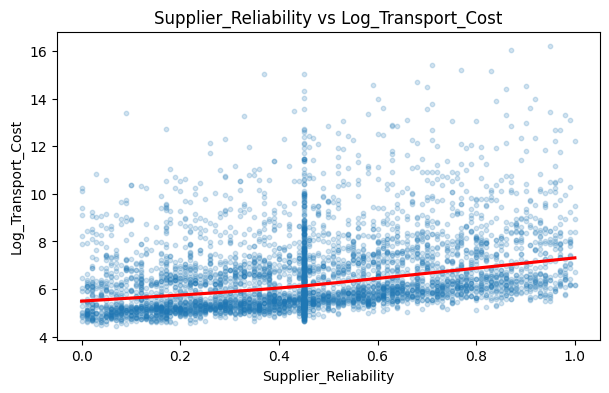

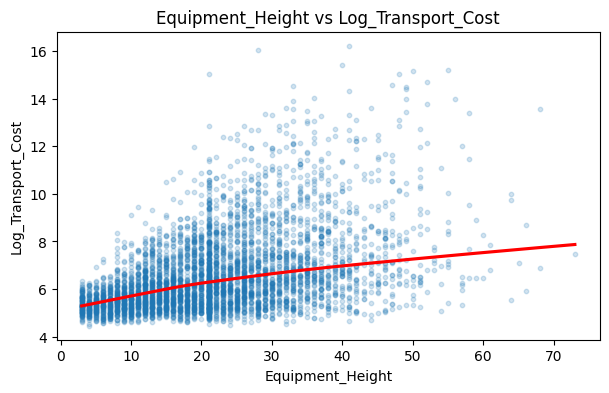

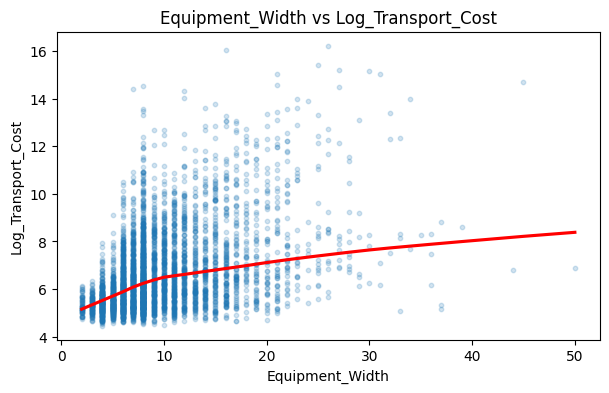

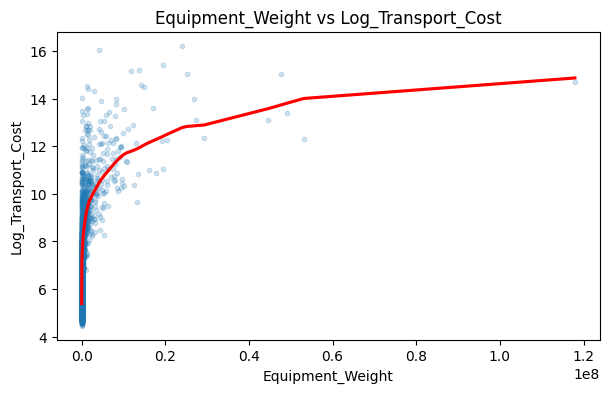

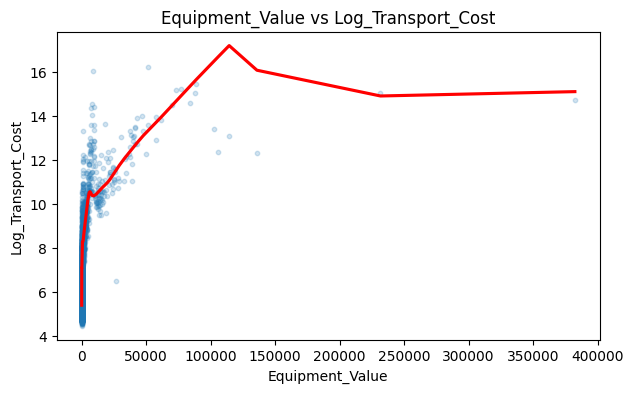

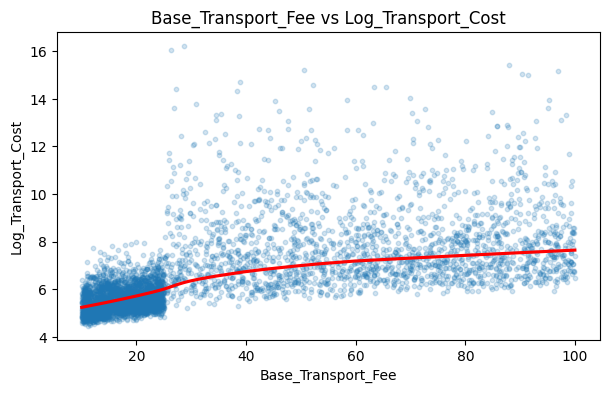

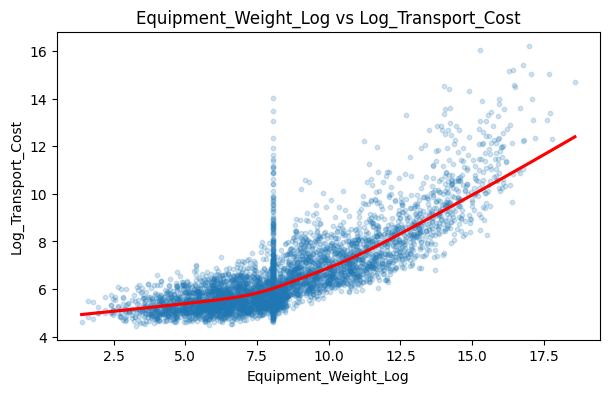

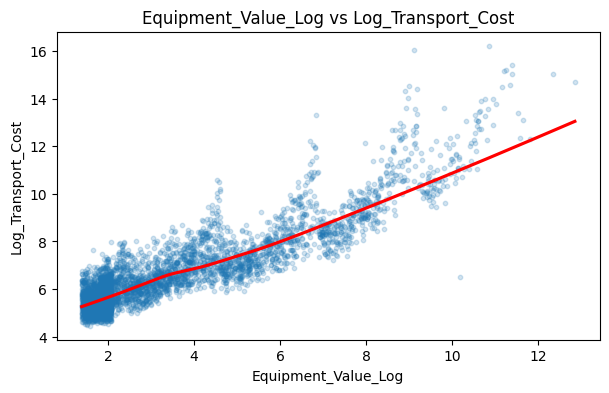


--- Plotting Categorical Features vs. Target ---
Skipping 'Hospital_Id': Too many unique values (4507)
Skipping 'Supplier_Name': Too many unique values (4477)


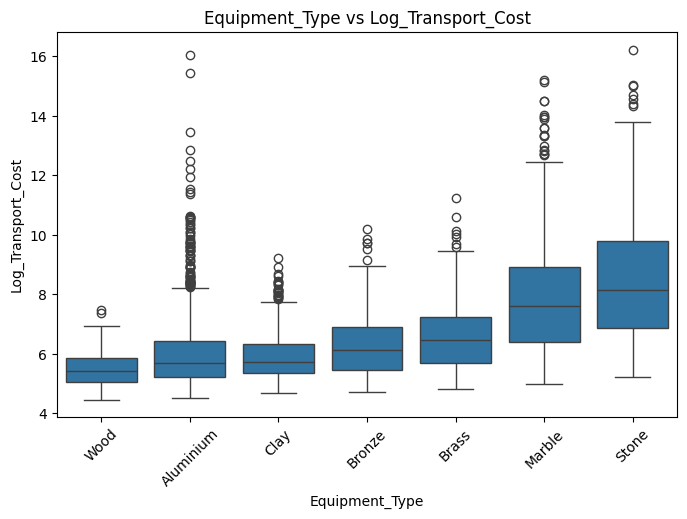

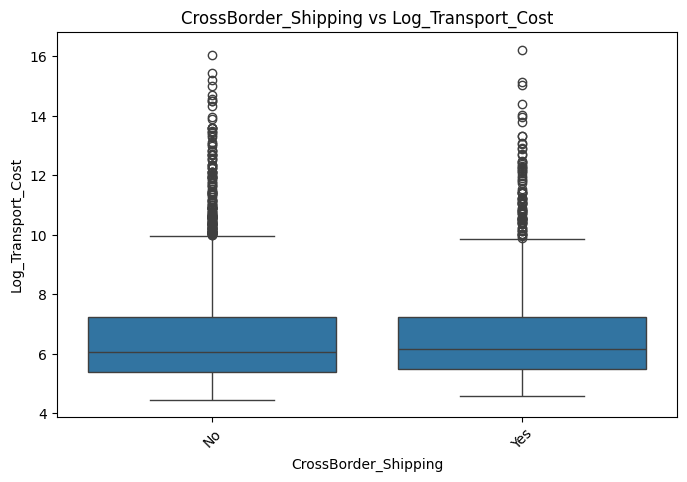

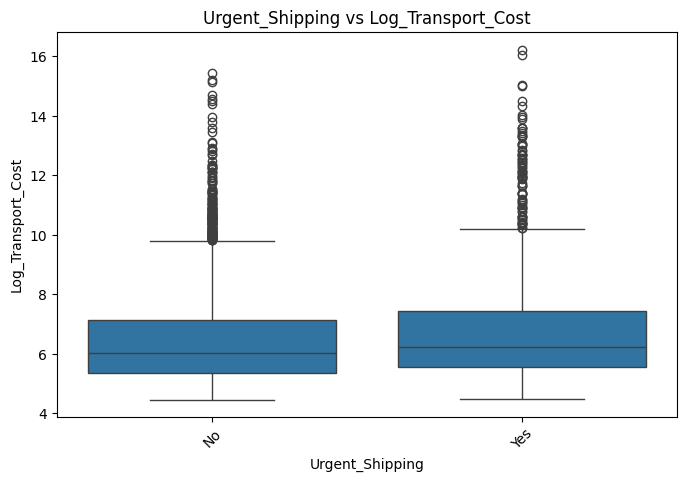

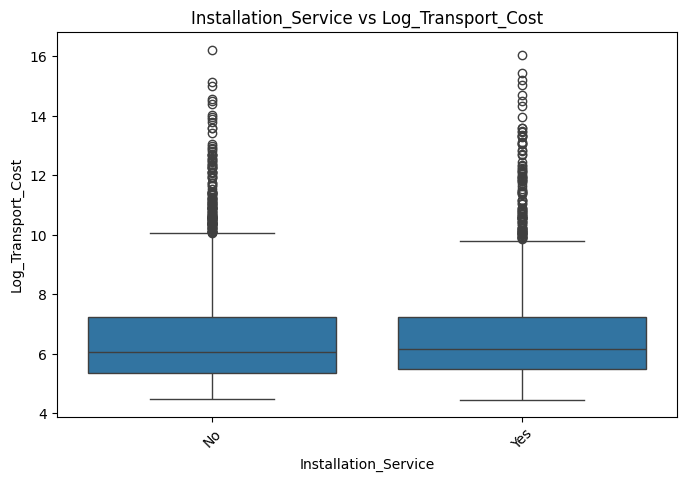

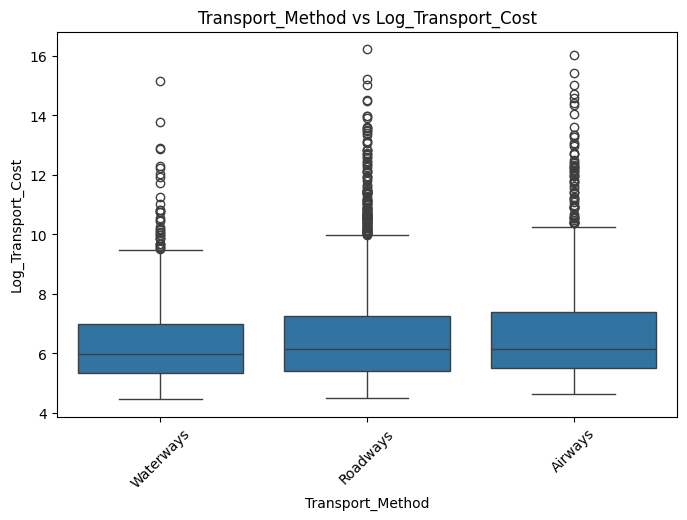

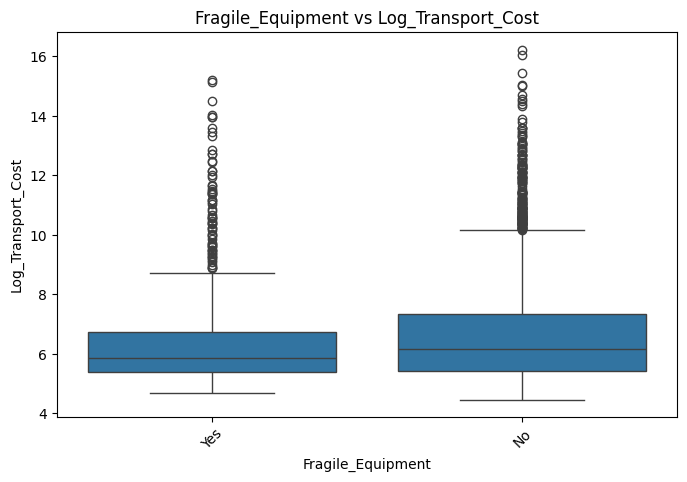

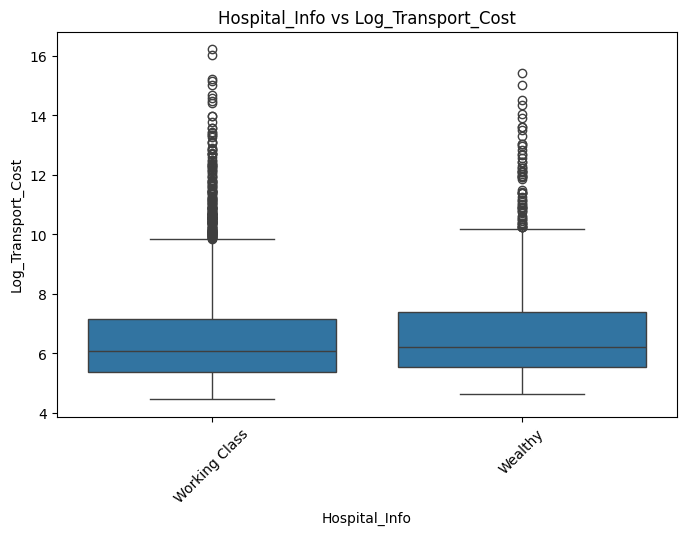

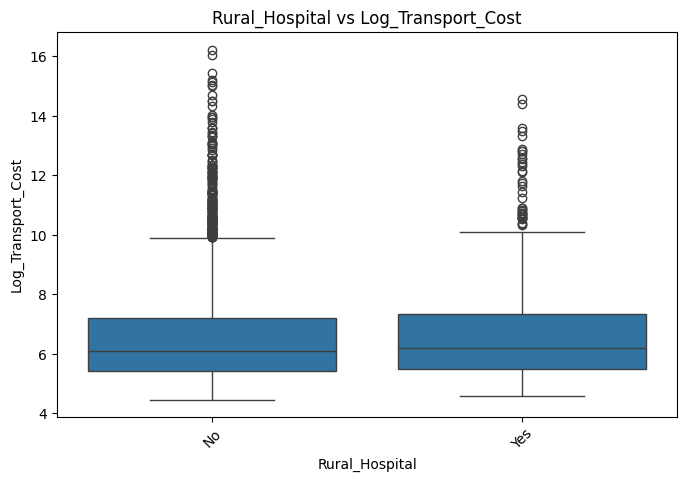

Skipping 'Order_Placed_Date': Too many unique values (1572)
Skipping 'Delivery_Date': Too many unique values (1583)
Skipping 'Hospital_Location': Too many unique values (4507)


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Plotting Numeric Features vs. Target ---")
for c in num_cols:
    # Skip binary features (like _Is_Missing flags)
    if df[c].nunique() > 2:
        plt.figure(figsize=(7, 4))
        
        # Use sns.regplot with lowess=True
        # It's a cleaner way to get the scatter + trend line
        try:
            sns.regplot(
                x=df[c], 
                y=df['Log_Transport_Cost'], 
                lowess=True, # This calculates and draws the trend line
                scatter_kws={'alpha': 0.2, 's': 10}, # Make points smaller/fainter
                line_kws={'color': 'red'}
            )
            plt.title(f"{c} vs {'Log_Transport_Cost'}")
            plt.show()
        except Exception as e:
            print(f"Could not plot {c}: {e}")

print("\n--- Plotting Categorical Features vs. Target ---")
for c in cat_cols:
    
    # --- Add check for high cardinality ---
    unique_count = df[c].nunique()
    if unique_count > 50:
        print(f"Skipping '{c}': Too many unique values ({unique_count})")
        continue
    # ---
    
    plt.figure(figsize=(max(8, unique_count * 0.5), 5)) # Dynamic width
    
    try:
        order = df.groupby(c)['Log_Transport_Cost'].median().sort_values().index
        sns.boxplot(x=c, y='Log_Transport_Cost', data=df, order=order)
        plt.xticks(rotation=45)
        plt.title(f"{c} vs {'Log_Transport_Cost'}")
        plt.show()
    except Exception as e:
        print(f"Could not plot {c}: {e}")

Converting date columns...
Found 1774 rows where Order_Placed_Date is after Delivery_Date.
Plotting 4507 rows


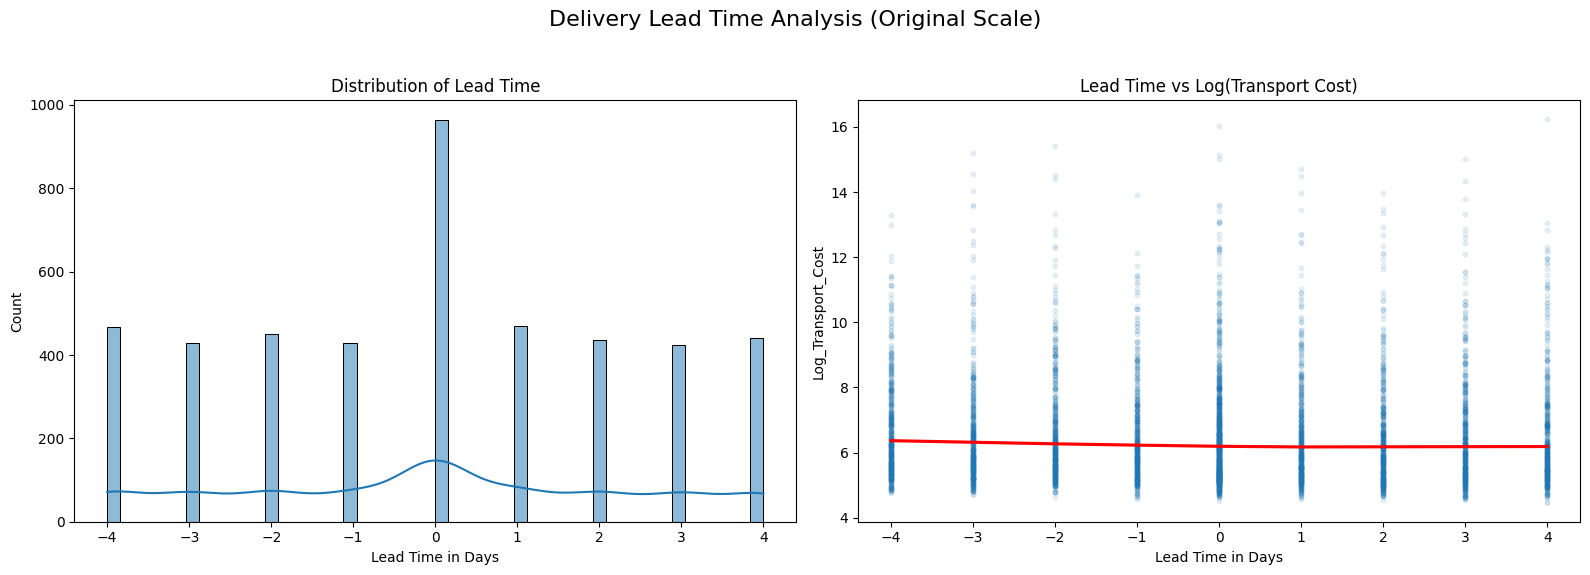

In [28]:
# check delivery date things 

# --- 1. Define the correct date format ---
date_format = '%m/%d/%y'

# --- 2. Convert columns to datetime objects ---
# 'errors='coerce'' will turn any invalid dates (like 02/30/2023) into NaT (NaN)
print("Converting date columns...")
df['Order_Placed_Date'] = pd.to_datetime(df['Order_Placed_Date'], 
                                         format=date_format, 
                                         errors='coerce')

df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'], 
                                     format=date_format, 
                                     errors='coerce')

# --- 3. Check for rows where "Placed" is *after* "Delivery" ---
# This is a key data quality check
invalid_dates_mask = (df['Order_Placed_Date'] > df['Delivery_Date'])
num_invalid_dates = invalid_dates_mask.sum()

print(f"Found {num_invalid_dates} rows where Order_Placed_Date is after Delivery_Date.")

# --- 4. Create the Lead Time feature ---
# This will be negative or NaN for invalid/missing dates
df['Delivery_Lead_Time_Days'] = (df['Delivery_Date'] - df['Order_Placed_Date']).dt.days
# means no missing data 


# --- 5. Clean the 'Delivery_Lead_Time_Days' feature ---
# Option A: (Recommended) Set bad values to NaN to be imputed later
# This treats both invalid dates (NaT) and negative lead times as 'missing'
#df.loc[df['Delivery_Lead_Time_Days'] < 0, 'Delivery_Lead_Time_Days'] = np.nan
#print(f"Total lead times to be imputed (missing or negative): {df['Delivery_Lead_Time_Days'].isnull().sum()}")

# Option B: (What you did before) Impute negatives with the median
# (Note: This still leaves NaNs from invalid dates to be imputed)
# lead_time_median = df.loc[df['Delivery_Lead_Time_Days'] >= 0, 'Delivery_Lead_Time_Days'].median()
# df.loc[df['Delivery_Lead_Time_Days'] < 0, 'Delivery_Lead_Time_Days'] = lead_time_median
# print(f"Replaced {num_invalid_dates} negative lead times with median value: {lead_time_median}")


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Prepare data for plotting ---
# Use the original lead time column.
# We'll drop NaNs for plotting
df_plot = df.copy()

print(f"Plotting {len(df_plot)} rows")

# --- 2. Create the 1x2 Plot Grid ---
plt.figure(figsize=(16, 6))
plt.suptitle('Delivery Lead Time Analysis (Original Scale)', fontsize=16)

# --- Plot 1: Histogram of Original Lead Time ---
plt.subplot(1, 2, 1)
sns.histplot(data=df_plot, x='Delivery_Lead_Time_Days', kde=True, bins=50)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time in Days')

# --- Plot 2: Scatter Plot of Original Lead Time vs. Log(Cost) ---
plt.subplot(1, 2, 2)
sns.regplot(
    data=df_plot,
    x='Delivery_Lead_Time_Days', # Use the original column
    y='Log_Transport_Cost',
    lowess=True, # This calculates and draws the trend line
    scatter_kws={'alpha': 0.1, 's': 10}, # Make points smaller/fainter
    line_kws={'color': 'red'}
)
plt.title('Lead Time vs Log(Transport Cost)')
plt.xlabel('Lead Time in Days')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Calculated median lead time (from non-negative values): 1.0


/tmp/ipykernel_1938/3937033692.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Delivery_Lead_Time_Days'].fillna(0, inplace=True)


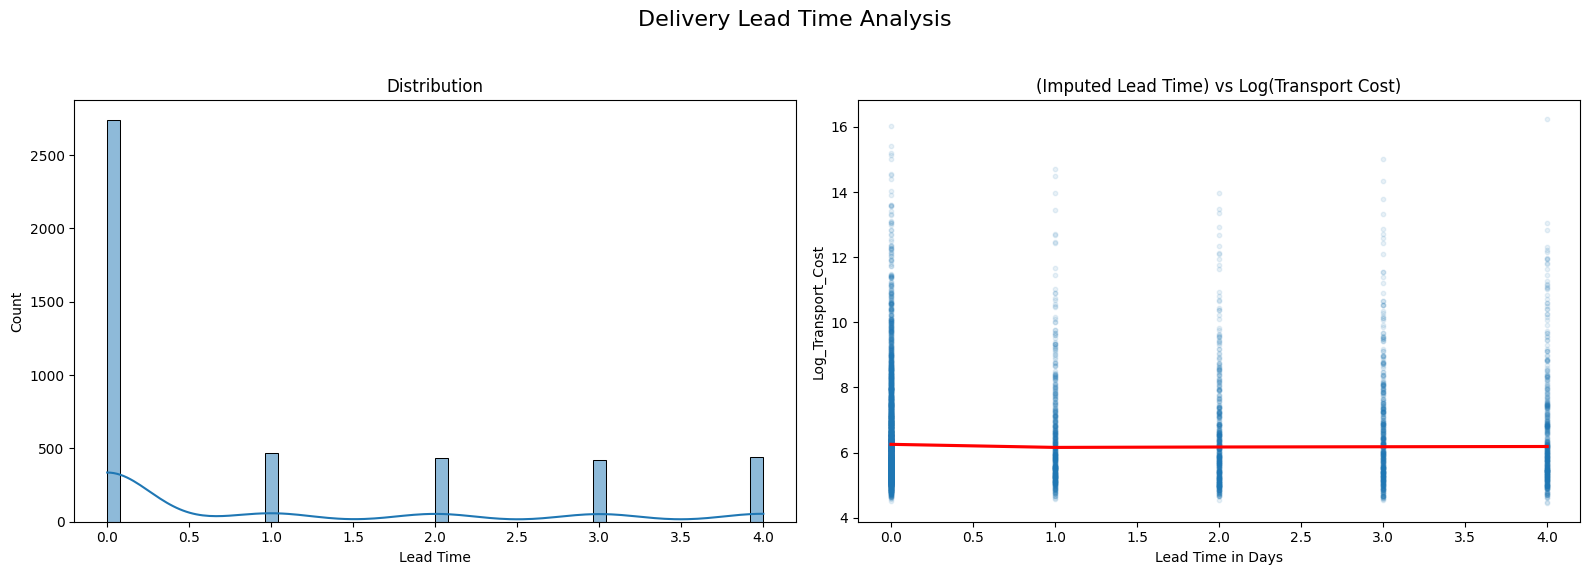


Description of the final imputed Lead Time column:
count    4507.00000
mean        0.97160
std         1.40084
min         0.00000
25%         0.00000
50%         0.00000
75%         2.00000
max         4.00000
Name: Delivery_Lead_Time_Days, dtype: float64


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Clean and Impute the Lead Time Data --
# Set negative lead times to NaN
df.loc[df['Delivery_Lead_Time_Days'] < 0, 'Delivery_Lead_Time_Days'] = np.nan

# Calculate the median of the *valid* (non-negative) lead times
median_lead_time = df.loc[df['Delivery_Lead_Time_Days'] >= 0, 'Delivery_Lead_Time_Days'].median()
print(f"Calculated median lead time (from non-negative values): {median_lead_time}")

# Option 1: Fill ALL NaNs (original ones + the negatives we just created) with the median
#df['Delivery_Lead_Time_Days'].fillna(median_lead_time, inplace=True)

#Option 2: Fill all NaNs with 0 
df['Delivery_Lead_Time_Days'].fillna(0, inplace=True)

# --- 2. Log-Transform the Imputed Lead Times ---
# Use log1p which calculates log(1 + x), safely handling 0 lead time
#df['Delivery_Lead_Time_Days_Log'] = np.log1p(df['Delivery_Lead_Time_Days'])

# --- 3. Create the 1x2 Plot Grid ---
plt.figure(figsize=(16, 6))
plt.suptitle('Delivery Lead Time Analysis', fontsize=16)

# --- Plot 1: Histogram of Log-Transformed Imputed Lead Time ---
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Delivery_Lead_Time_Days', kde=True, bins=50)
plt.title('Distribution')
plt.xlabel('Lead Time')

# --- Plot 2: Scatter Plot of Log(Imputed Lead Time) vs. Log(Cost) ---
plt.subplot(1, 2, 2)
# Need to drop NaNs from Log_Transport_Cost for plotting
df_plot_imputed = df.dropna(subset=['Log_Transport_Cost']) 
sns.regplot(
    data=df_plot_imputed,
    x='Delivery_Lead_Time_Days',
    y='Log_Transport_Cost',
    lowess=True, # Trend line
    scatter_kws={'alpha': 0.1, 's': 10},
    line_kws={'color': 'red'}
)
plt.title('(Imputed Lead Time) vs Log(Transport Cost)')
plt.xlabel('Lead Time in Days')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Optional: Check the description of the final column ---
print("\nDescription of the final imputed Lead Time column:")
print(df['Delivery_Lead_Time_Days'].describe())


--- Plotting Other Date Features vs. Target ---


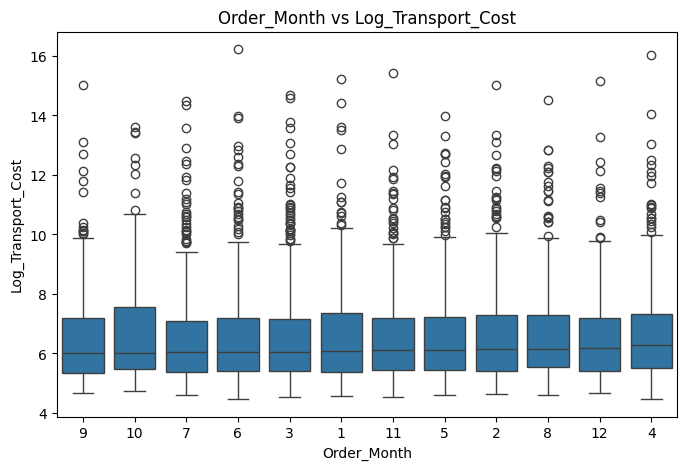

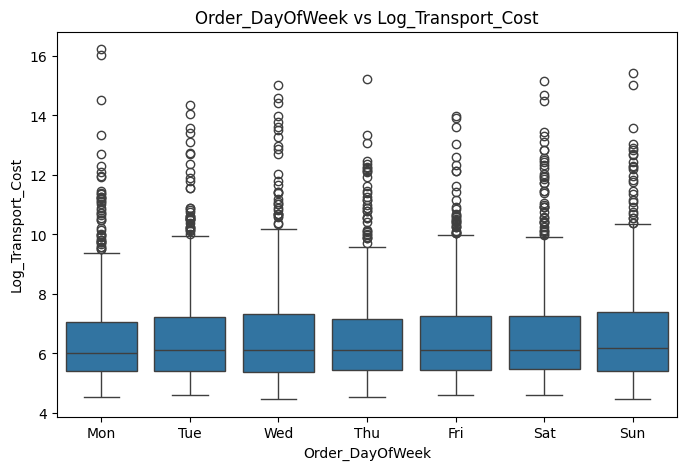

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Ensure Date Columns are Created ---
# Make sure Order_Placed_Date is datetime
if not pd.api.types.is_datetime64_any_dtype(df['Order_Placed_Date']):
     df['Order_Placed_Date'] = pd.to_datetime(df['Order_Placed_Date'], errors='coerce')

# Create features if they don't exist
if 'Order_Month' not in df.columns:
    df['Order_Month'] = df['Order_Placed_Date'].dt.month
if 'Order_DayOfWeek' not in df.columns:
    df['Order_DayOfWeek'] = df['Order_Placed_Date'].dt.dayofweek

# --- 2. Define Features to Plot ---
date_features_to_plot = ['Order_Month', 'Order_DayOfWeek']
df_plot_dates = df.dropna(subset=date_features_to_plot + ['Log_Transport_Cost']).copy()

# --- 3. Create Boxplots ---
print("\n--- Plotting Other Date Features vs. Target ---")
for col in date_features_to_plot:
    unique_count = df_plot_dates[col].nunique()
    plt.figure(figsize=(max(8, unique_count * 0.6), 5)) # Dynamic width

    try:
        # Sort categories by median cost
        order = df_plot_dates.groupby(col)['Log_Transport_Cost'].median().sort_values().index
        sns.boxplot(x=col, y='Log_Transport_Cost', data=df_plot_dates, order=order)
        
        # Improve labels for DayOfWeek
        if col == 'Order_DayOfWeek':
             plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
             
        plt.title(f"{col} vs Log_Transport_Cost")
        plt.show()
    except Exception as e:
        print(f"Could not plot {col}: {e}")

In [31]:
print('We can see nothing is good so we can leave these features')

We can see nothing is good so we can leave these features


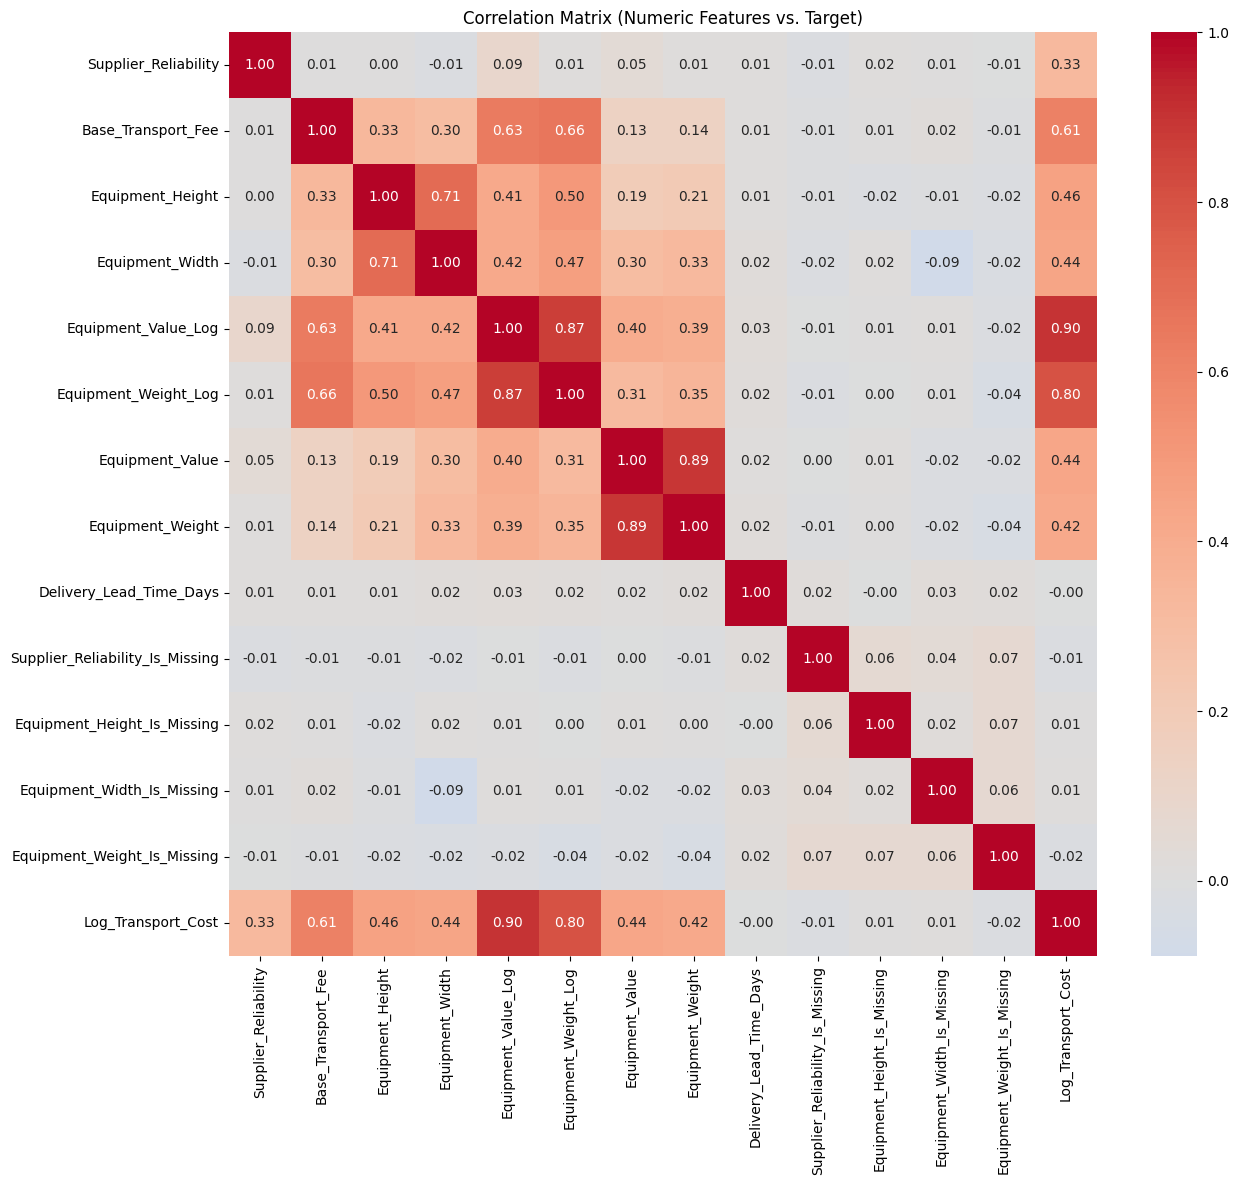


--- VIF Calculation ---
Features used for VIF (4507 rows): ['Supplier_Reliability', 'Base_Transport_Fee', 'Equipment_Height', 'Equipment_Width', 'Equipment_Value_Log', 'Equipment_Weight_Log', 'Equipment_Value', 'Equipment_Weight', 'Delivery_Lead_Time_Days', 'Supplier_Reliability_Is_Missing', 'Equipment_Height_Is_Missing', 'Equipment_Width_Is_Missing', 'Equipment_Weight_Is_Missing']

Multicollinearity Check (VIF):


,feature,VIF
5,Equipment_Weight_Log,24.877100
4,Equipment_Value_Log,12.470216
2,Equipment_Height,9.975546
3,Equipment_Width,9.371404
1,Base_Transport_Fee,5.458738
6,Equipment_Value,5.244950
7,Equipment_Weight,5.140165
0,Supplier_Reliability,3.515266
8,Delivery_Lead_Time_Days,1.457001
9,Supplier_Reliability_Is_Missing,1.136357


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import display

# --- 1. Define the Final Set of Numeric Features ---

# A. The features we are KEEPING (the best versions)
num_cols_for_analysis = [
    'Supplier_Reliability',            # Fixed and Imputed (0-1 range)
    'Base_Transport_Fee',              # Good distribution
    'Equipment_Height',                # Good distribution
    'Equipment_Width',                 # Good distribution
    'Equipment_Value_Log',             # Log-transformed version
    'Equipment_Weight_Log',            # Log-transformed version
    'Equipment_Value',
    'Equipment_Weight',
    'Delivery_Lead_Time_Days'
] 

# B. Add the Binary/Indicator Features 
indicator_cols = [
    'Supplier_Reliability_Is_Missing',
    'Equipment_Height_Is_Missing',
    'Equipment_Width_Is_Missing',
    'Equipment_Weight_Is_Missing',
]

# Add indicator columns only if they exist in the DataFrame
for col in indicator_cols:
    if col in df.columns:
        num_cols_for_analysis.append(col)

# --- 2. Correlation Matrix ---
# Correlation analysis includes the target
corr_data = df[num_cols_for_analysis + ['Log_Transport_Cost']].copy()
corr = corr_data.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Numeric Features vs. Target)')
plt.show()

# --- 3. VIF Calculation ---
X_for_vif = df[num_cols_for_analysis].dropna()

print("\n--- VIF Calculation ---")
print(f"Features used for VIF ({len(X_for_vif)} rows): {num_cols_for_analysis}")

# Calculation
vif_list = [variance_inflation_factor(X_for_vif.values, i) 
            for i in range(X_for_vif.shape[1])]

vif_df = pd.DataFrame({
    'feature': X_for_vif.columns,
    'VIF': vif_list
}).sort_values('VIF', ascending=False)

print("\nMulticollinearity Check (VIF):")
display(vif_df)

In [33]:
### we make new feature due to high correlation between height and width of equipment 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import display

df['Equipment_Volume'] = df['Equipment_Height'] * df['Equipment_Width']

# The final list uses the best version of each feature
final_numeric_features = [
    'Equipment_Volume', 
    'Equipment_Height',
    'Equipment_Width',
    'Equipment_Value_Log',
    'Equipment_Weight_Log',
    'Base_Transport_Fee',
    'Supplier_Reliability',
    'Supplier_Reliability_Is_Missing',
    'Equipment_Height_Is_Missing',
    'Equipment_Width_Is_Missing',
    'Equipment_Weight_Is_Missing'
]

# --- 3. Filter Data for VIF Calculation ---

# Ensure all features in the final list actually exist
final_numeric_features = [f for f in final_numeric_features if f in df.columns]

# Drop NaNs from the final feature set for stable VIF calculation
X_for_vif = df[final_numeric_features].dropna()

# --- 4. VIF Calculation ---
print("--- New VIF Calculation with Equipment_Volume ---")
print(f"Calculating VIF on {len(X_for_vif)} complete rows...")

# Calculation
vif_list = [variance_inflation_factor(X_for_vif.values, i) 
            for i in range(X_for_vif.shape[1])]

vif_df_new = pd.DataFrame({
    'feature': X_for_vif.columns,
    'VIF': vif_list
}).sort_values('VIF', ascending=False)

print("\nMulticollinearity Check (New VIF Scores):")
display(vif_df_new)

--- New VIF Calculation with Equipment_Volume ---
Calculating VIF on 4507 complete rows...

Multicollinearity Check (New VIF Scores):


,feature,VIF
4,Equipment_Weight_Log,37.857047
2,Equipment_Width,27.450182
0,Equipment_Volume,18.443663
1,Equipment_Height,16.258081
3,Equipment_Value_Log,12.766956
5,Base_Transport_Fee,5.329999
6,Supplier_Reliability,3.721800
7,Supplier_Reliability_Is_Missing,1.136432
9,Equipment_Width_Is_Missing,1.131331
10,Equipment_Weight_Is_Missing,1.108873


In [34]:
# remove weight_log as very high correlation 

final_numeric_features = [
    'Equipment_Volume',          
    'Equipment_Value_Log',         
    'Base_Transport_Fee',          
    'Supplier_Reliability',        
    'Supplier_Reliability_Is_Missing',
    'Equipment_Width_Is_Missing',
    'Equipment_Height_Is_Missing',
    'Equipment_Weight_Is_Missing'
]

# --- 2. VIF Calculation ---

# Filter the list to only include features currently in your DataFrame
final_numeric_features = [f for f in final_numeric_features if f in df.columns]

# Drop NaNs from the final feature set for stable VIF calculation
X_for_vif = df[final_numeric_features].dropna()

print("\n--- Final VIF Check After Removals ---")
print(f"Features being checked: {final_numeric_features}")
print(f"Calculating VIF on {len(X_for_vif)} complete rows...")

# Calculation
vif_list = [variance_inflation_factor(X_for_vif.values, i) 
            for i in range(X_for_vif.shape[1])]

vif_df_final = pd.DataFrame({
    'feature': X_for_vif.columns,
    'VIF': vif_list
}).sort_values('VIF', ascending=False)

print("\nMulticollinearity Check (Final VIF Scores):")
display(vif_df_final)


--- Final VIF Check After Removals ---
Features being checked: ['Equipment_Volume', 'Equipment_Value_Log', 'Base_Transport_Fee', 'Supplier_Reliability', 'Supplier_Reliability_Is_Missing', 'Equipment_Width_Is_Missing', 'Equipment_Height_Is_Missing', 'Equipment_Weight_Is_Missing']
Calculating VIF on 4507 complete rows...

Multicollinearity Check (Final VIF Scores):


,feature,VIF
1,Equipment_Value_Log,6.001120
2,Base_Transport_Fee,4.667834
3,Supplier_Reliability,2.521296
0,Equipment_Volume,2.231405
4,Supplier_Reliability_Is_Missing,1.122751
5,Equipment_Width_Is_Missing,1.104983
7,Equipment_Weight_Is_Missing,1.100217
6,Equipment_Height_Is_Missing,1.066121


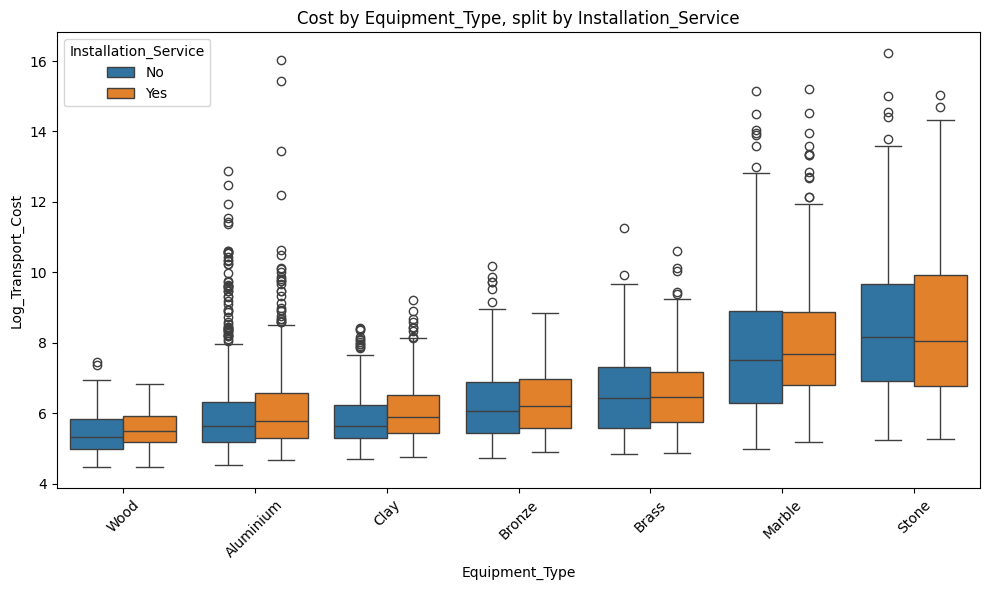

In [35]:
# Check two highly predictive categorical features for interaction
cat1 = 'Equipment_Type'  # High predictive power
cat2 = 'Installation_Service' # Good predictive power (Yes/No)

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, 
    x=cat1, 
    y='Log_Transport_Cost', 
    hue=cat2, # Use the second feature for color splitting
    order=df.groupby(cat1)['Log_Transport_Cost'].median().sort_values().index # Keep it sorted
)
plt.title(f'Cost by {cat1}, split by {cat2}')
plt.xticks(rotation=45)
plt.legend(title=cat2)
plt.tight_layout()
plt.show()

In [36]:
#FOR LINEAR MODELS, we can include interactions like 
#df['Stone_Install_Interaction'] = ((df['Equipment_Type'] == 'Stone').astype(int) * (df['Installation_Service'] == 'Yes').astype(int))

In [37]:
#Other pre processing now ---

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Example: Label encoding for all categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Example: Feature Engineering (customize as needed)
# df['New_Feature'] = df['Feature1'] * df['Feature2']  # Example nonlinear feature

# Standardising numerical features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [39]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Transport_Cost', 'Log_Transport_Cost'])
Y = df['Log_Transport_Cost']

# 80% train, 20% test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")


X_train shape: (3605, 29)
Y_train shape: (3605,)
X_test shape: (902, 29)
Y_test shape: (902,)
